DSC5104 MAIN PROJECT
DESCRIPTION : ANALYSIS OF GLOBAL TRADE BETWEEN 1990-2010 TO UNDERSTAND IF A DIVERSIFIED TRADE REGIME FARES BETTER FOR SMALLER COUNTRIES TO ABSORB GLOBAL ECONOMIC SHOCKS

MEMBERS : DAVID RAJ, SHUNICHI ARAKI, SWAPNA SAMIR SHUKLA, NOBLE TOMY PADIYARA 


CONTENTS
  1. Data Preprocessing
  2. Analysis of Global trade from 1990-2010
  3. Separation of data to ASEAN, SAARC AND G20
  4. Analysis of trade among these trade blocks in the years 1990-2010 

In [0]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:

#from google.colab import files
#uploaded = files.upload()

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1jg1IHSowxEmM4aGvWyK4H-Ri1i84DdrL' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


1jg1IHSowxEmM4aGvWyK4H-Ri1i84DdrL


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('import.csv')  
import_data = pd.read_csv('import.csv')

In [0]:
import_data.head()

,Nomenclature,ReporterISO3,ProductCode,ReporterName,PartnerISO3,PartnerName,Year,TradeFlowName,TradeFlowCode,TradeValue in 1000 USD
0,BE,ARE,Total,United Arab Emirates,AFG,Afghanistan,1991,Import,5,162.246
1,BE,ARE,Total,United Arab Emirates,AFG,Afghanistan,1992,Import,5,39.020
2,BE,ARE,Total,United Arab Emirates,ARG,Argentina,1991,Import,5,2313.518
3,BE,ARE,Total,United Arab Emirates,ARG,Argentina,1992,Import,5,3346.953
4,BE,ARE,Total,United Arab Emirates,ARM,Armenia,1992,Import,5,17.434


In [0]:
import_1990 = import_data[import_data["Year"]==1990]
import_1991 = import_data[import_data["Year"]==1991]
import_1992 = import_data[import_data["Year"]==1992]
import_1993 = import_data[import_data["Year"]==1993]
import_1994 = import_data[import_data["Year"]==1994]
import_1995 = import_data[import_data["Year"]==1995]
import_1996 = import_data[import_data["Year"]==1996]
import_1997 = import_data[import_data["Year"]==1997]
import_1998 = import_data[import_data["Year"]==1998]
import_1999 = import_data[import_data["Year"]==1999]
import_2000 = import_data[import_data["Year"]==2000]
import_2001 = import_data[import_data["Year"]==2001]
import_2002 = import_data[import_data["Year"]==2002]
import_2003 = import_data[import_data["Year"]==2003]
import_2004 = import_data[import_data["Year"]==2004]
import_2005 = import_data[import_data["Year"]==2005]
import_2006 = import_data[import_data["Year"]==2006]
import_2007 = import_data[import_data["Year"]==2007]
import_2008 = import_data[import_data["Year"]==2008]
import_2009 = import_data[import_data["Year"]==2009]
import_2010 = import_data[import_data["Year"]==2010]


In [0]:
type(import_1990)

pandas.core.frame.DataFrame

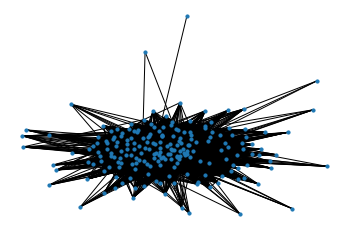

In [0]:
G_1990 = nx.Graph()

for i in range(0,len(import_1990)):
    G_1990.add_edge(import_1990.iloc[i,3],import_1990.iloc[i,5])

pos_1990 = nx.spring_layout(G_1990)
nx.draw_networkx(G_1990, pos_1990,with_labels=False, node_size=10 )
plt.axis("off")
plt.show()


In [0]:
graph_list = []
import_list = []
for i in range(1990,2011):
  graph_list.append('G_'+str(i))
  import_list.append('import_'+str(i))
print(graph_list)
print(import_list)

['G_1990', 'G_1991', 'G_1992', 'G_1993', 'G_1994', 'G_1995', 'G_1996', 'G_1997', 'G_1998', 'G_1999', 'G_2000', 'G_2001', 'G_2002', 'G_2003', 'G_2004', 'G_2005', 'G_2006', 'G_2007', 'G_2008', 'G_2009', 'G_2010']
['import_1990', 'import_1991', 'import_1992', 'import_1993', 'import_1994', 'import_1995', 'import_1996', 'import_1997', 'import_1998', 'import_1999', 'import_2000', 'import_2001', 'import_2002', 'import_2003', 'import_2004', 'import_2005', 'import_2006', 'import_2007', 'import_2008', 'import_2009', 'import_2010']


In [0]:
j = 1990
for i in range(0,20):
  import_list[i] = import_data[import_data["Year"]==j]
  j = j+1

In [0]:
type(import_list[0])
import_list[0].head()

,Nomenclature,ReporterISO3,ProductCode,ReporterName,PartnerISO3,PartnerName,Year,TradeFlowName,TradeFlowCode,TradeValue in 1000 USD
221,BE,ARG,Total,Argentina,AFG,Afghanistan,1990,Import,5,12.731
223,BE,ARG,Total,Argentina,AGO,Angola,1990,Import,5,34.346
225,BE,ARG,Total,Argentina,ALB,Albania,1990,Import,5,21.705
229,BE,ARG,Total,Argentina,ANT,Netherlands Antilles,1990,Import,5,728.970
233,BE,ARG,Total,Argentina,AUS,Australia,1990,Import,5,89415.382


In [0]:
for i in range(0,20):
  graph_list[i] = nx.Graph()

type(graph_list[0])

networkx.classes.graph.Graph

In [0]:
len(import_list[0])

11555

In [0]:
###############################################################################

for j in range(0,20):
  graph_list[j] = nx.Graph()
  for i in range(0,len(import_list[j])):
      graph_list[j].add_edge(import_list[j].iloc[i,3],import_list[j].iloc[i,5])

#pos_1991 = nx.spring_layout(G_1991)
##############################################################################
#nx.draw_networkx(G_1991, pos_1990,with_labels=False, node_size=10 )
#plt.axis("off")
#plt.show()
###############################################################################





In [0]:
#matrix
no_of_nodes = []
no_of_edges = []
dens = []
avg_degree = []
avg_shortest_path = []
avg_clustering_coefficient = []
clustering_coefficient = []
diameter_value = []
for i in range(0,20):
  # print number of nodes
  print("Number of Nodes: for Global trade "+str(1990+i), nx.number_of_nodes(graph_list[i]))
  no_of_nodes.append(nx.number_of_nodes(graph_list[i]))
  # print number of edges
  print("Number of Edges: for Global trade "+str(1990+i), nx.number_of_edges(graph_list[i]))
  no_of_edges.append(nx.number_of_edges(graph_list[i]))
  # print density of network
  print("Density: for Global trade "+str(1990+i), nx.density(graph_list[i]))
  dens.append(nx.density(graph_list[i]))
  # Average degree
  print("Average Degree: for Global trade "+str(1990+i), 2*nx.number_of_edges(graph_list[i]) / float(nx.number_of_nodes(graph_list[i])))
  avg_degree.append(2*nx.number_of_edges(graph_list[i]) / float(nx.number_of_nodes(graph_list[i])))
  # print average shortest path length
  print("Average Shortest Path Length: for Global trade "+str(1990+i), nx.average_shortest_path_length(graph_list[i]))
  avg_shortest_path.append(nx.average_shortest_path_length(graph_list[i]))
  # print average clustering coefficient
  print("Average Clustering Coefficient: for Global trade "+str(1990+i), nx.average_clustering(graph_list[i]))
  avg_clustering_coefficient.append(nx.average_clustering(graph_list[i]))
  #print clustering coefficient
  print("Clustering Coefficient: for Global trade "+str(1990+i), nx.clustering(graph_list[i]))
  clustering_coefficient.append(nx.clustering(graph_list[i]))
  #print diameter
  print("Diameter: for Global trade "+str(1990+i), nx.diameter(graph_list[i]))
  diameter_value.append(nx.diameter(graph_list[i]))

Number of Nodes: for Global trade 1990 205
Number of Edges: for Global trade 1990 8377
Density: for Global trade 1990 0.40062171209947395
Average Degree: for Global trade 1990 81.72682926829269
Average Shortest Path Length: for Global trade 1990 1.6057867049258727
Average Clustering Coefficient: for Global trade 1990 0.8271875168635504
Clustering Coefficient: for Global trade 1990 {'Argentina': 0.7131621559102476, 'Afghanistan': 0.9730639730639731, 'Angola': 0.9770580296896086, 'Albania': 0.946448087431694, 'Netherlands Antilles': 0.9393442622950819, 'Australia': 0.5683302426832219, 'Austria': 0.4957627118644068, 'Benin': 0.9831932773109243, 'Bangladesh': 0.7348484848484849, 'Bulgaria': 0.9004103967168262, 'Bahrain': 0.9528769841269841, 'Bahamas, The': 0.9595628415300547, 'Belgium-Luxembourg': 0.511793236329812, 'Bermuda': 0.956140350877193, 'Bolivia': 0.7446886446886447, 'Brazil': 0.7037037037037037, 'Barbados': 0.7574719208071579, 'Central African Republic': 0.9805735430157262, 'Cana

In [0]:
list_of_years = []
for i in range(0,20):
  list_of_years.append(1990+i)
type(list_of_years[0])

int

In [0]:
type(avg_clustering_coefficient[0])

float

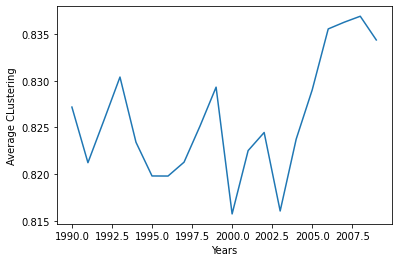

In [0]:

plt.plot(list_of_years,avg_clustering_coefficient)
plt.xlabel('Years')
plt.ylabel('Average CLustering')
plt.show()
#The clustering coefficient (Watts-Strogatz), when applied to a single node, is a measure of how complete the neighborhood of a node is.
# When applied to an entire network, it is the average clustering coefficient over all of the nodes in the network
#the neighbourhood shows deep downward slops during 2000 and 2003

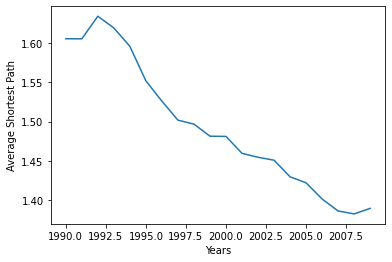

In [0]:
plt.plot( list_of_years,avg_shortest_path)
plt.xlabel('Years')
plt.ylabel('Average Shortest Path')
plt.show()

#defined as the average number of steps along the shortest paths 
#for all possible pairs of network nodes. It is a measure of the efficiency 
#of information or mass transport on a network

#the average shortest path increases after 2007 possibly due to the financial crisis

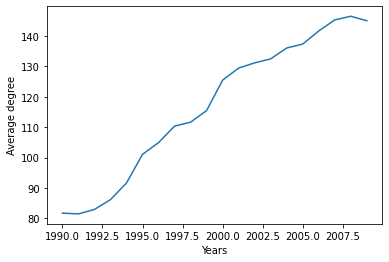

In [0]:

plt.plot( list_of_years,avg_degree)
plt.xlabel('Years')
plt.ylabel('Average degree')
plt.show()


#Average degree is simply the average number of edges per node in the graph.
# Let us assume that the average degree in the one network is two, while in the second network it is five.
# This statistic informs us that people in the second network have more friends within the group than in the first network.

#Result : Average degree of global trade goes down after 2007

In [0]:
#TO DO

#TAKE SUBGRAPHS OF G20,ASEAN, SAARC ETC AND ANALYZE THE METRICS 
# CALCULATE DEGREE CENTRALITY ,BETWEENNESS ETC
#FIND OUT CLUSTERS IN EACH YEAR
# ANALYZE DIFFERENT PATTERNS OF CLUSTERING OVER THE YEARS
#CHECK WHICH STATE HAS IMPROVED THE MOST AND HOW (eg LAOS REPUBLIC)

In [0]:
Asean_list = ['Singapore','Thailand','Myanmar','Lao PDR','Vietnam','Brunei','Philippines','Malaysia','Cambodia','Indonesia']
Saarc_list = ['India','Pakistan','Nepal','Bhutan','Myanmar','Sri Lanka','Maldives'] 
G20_list = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 
            'Germany', 'France', 'India', 'Indonesia', 'Italy',
            'Japan', 'Mexico', 'Saudi Arabia', 'South Africa',
           'Turkey','United States','United Kingdom']
Mercusor_list = ['Argentina','Brazil','Paraguay','Uruguay','Bolivia','Chile','Colombia','Ecuador','Guyana','Peru','Suriname']
Nafta_list = ['United States','Canada','Mexico']
European_union_list = ['Austria', 'Belgium-Luxembourg', 'Bulgaria', 'Cyprus', 'Denmark', 'Estonia', 
                       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
                        'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain','Sweden','United Kingdom']
  


In [0]:
Asean_list[1]

'Thailand'

In [0]:
degree_deviation_asean = []
degree_asean_yearwise = []
for j in range(0,20):
  degree_deviation_asean = []
  for i in range(len(Asean_list)):
    print(graph_list[j].degree[Asean_list[i]],"  ",Asean_list[i]," ", list_of_years[j])
    degree_deviation_asean.append(graph_list[j].degree[Asean_list[i]])
  degree_asean_yearwise.append(degree_deviation_asean)
#degree_deviation_asean
#change in degree of each node over time

140    Singapore   1990
160    Thailand   1990
57    Myanmar   1990
36    Lao PDR   1990
67    Vietnam   1990
80    Brunei   1990
126    Philippines   1990
182    Malaysia   1990
41    Cambodia   1990
140    Indonesia   1990
137    Singapore   1991
153    Thailand   1991
63    Myanmar   1991
36    Lao PDR   1991
69    Vietnam   1991
82    Brunei   1991
124    Philippines   1991
169    Malaysia   1991
38    Cambodia   1991
138    Indonesia   1991
140    Singapore   1992
164    Thailand   1992
114    Myanmar   1992
43    Lao PDR   1992
83    Vietnam   1992
107    Brunei   1992
123    Philippines   1992
174    Malaysia   1992
45    Cambodia   1992
141    Indonesia   1992
144    Singapore   1993
180    Thailand   1993
69    Myanmar   1993
50    Lao PDR   1993
89    Vietnam   1993
88    Brunei   1993
143    Philippines   1993
175    Malaysia   1993
48    Cambodia   1993
143    Indonesia   1993
150    Singapore   1994
188    Thailand   1994
66    Myanmar   1994
53    Lao PDR   1994
95    Vie

In [0]:
#List of degree of ASEAN countries from 1990-2010 
print('Countries in Asean',Asean_list)
print('List of year analyzed',list_of_years)
print('Degree distribution across years for each country',degree_asean_yearwise)

Countries in Asean ['Singapore', 'Thailand', 'Myanmar', 'Lao PDR', 'Vietnam', 'Brunei', 'Philippines', 'Malaysia', 'Cambodia', 'Indonesia']
List of year analyzed [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
Degree distribution across years for each country [[140, 160, 57, 36, 67, 80, 126, 182, 41, 140], [137, 153, 63, 36, 69, 82, 124, 169, 38, 138], [140, 164, 114, 43, 83, 107, 123, 174, 45, 141], [144, 180, 69, 50, 89, 88, 143, 175, 48, 143], [150, 188, 66, 53, 95, 103, 155, 193, 65, 151], [170, 187, 76, 58, 109, 55, 163, 190, 53, 162], [168, 191, 75, 63, 113, 52, 158, 186, 67, 161], [168, 193, 80, 67, 128, 94, 161, 181, 69, 200], [170, 198, 87, 67, 136, 95, 171, 178, 72, 194], [200, 202, 94, 76, 144, 55, 175, 194, 81, 199], [211, 222, 97, 93, 179, 76, 193, 195, 130, 215], [207, 219, 115, 96, 188, 113, 181, 207, 144, 214], [209, 218, 113, 96, 190, 110, 200, 212, 145, 221], [189, 224, 105, 99, 204, 107, 207, 21

In [0]:
Asean_subgraph= []
for i in range(0,20):
  Asean_subgraph.append('Asean_'+str(1990+i))
Asean_subgraph


['Asean_1990',
 'Asean_1991',
 'Asean_1992',
 'Asean_1993',
 'Asean_1994',
 'Asean_1995',
 'Asean_1996',
 'Asean_1997',
 'Asean_1998',
 'Asean_1999',
 'Asean_2000',
 'Asean_2001',
 'Asean_2002',
 'Asean_2003',
 'Asean_2004',
 'Asean_2005',
 'Asean_2006',
 'Asean_2007',
 'Asean_2008',
 'Asean_2009']

In [0]:
for i in range(0,20):
  Asean_subgraph[i] = graph_list[i].subgraph(Asean_list)

In [0]:
#Degree centrality of a node refers to the number of edges attached to the node. 
#In order to know the standardized score, you need to divide each score by n-1 (n = the number of nodes).

#Degree centrality is a good measure of the total connections a node has,
# but will not necessarily indicate the importance of a node in connecting others or how central it is to the main group

for i in range(0,20):
  print(sorted(nx.degree_centrality(Asean_subgraph[i]).items(),key = lambda x:x[1],reverse = True))

#Consistent position of Indonesia in the degree centrality distribution from 1990 to 2010
#Massive improvement for vietname from the year 1990-2010
#

[('Indonesia', 1.0), ('Thailand', 1.0), ('Malaysia', 1.0), ('Philippines', 0.8888888888888888), ('Brunei', 0.7777777777777777), ('Singapore', 0.6666666666666666), ('Myanmar', 0.6666666666666666), ('Vietnam', 0.5555555555555556), ('Lao PDR', 0.4444444444444444), ('Cambodia', 0.3333333333333333)]
[('Indonesia', 1.0), ('Thailand', 1.0), ('Malaysia', 1.0), ('Philippines', 0.8888888888888888), ('Brunei', 0.7777777777777777), ('Singapore', 0.6666666666666666), ('Myanmar', 0.6666666666666666), ('Vietnam', 0.5555555555555556), ('Lao PDR', 0.4444444444444444), ('Cambodia', 0.3333333333333333)]
[('Indonesia', 1.0), ('Thailand', 1.0), ('Singapore', 1.0), ('Malaysia', 1.0), ('Philippines', 0.8888888888888888), ('Myanmar', 0.8888888888888888), ('Brunei', 0.7777777777777777), ('Vietnam', 0.7777777777777777), ('Lao PDR', 0.5555555555555556), ('Cambodia', 0.5555555555555556)]
[('Indonesia', 1.0), ('Thailand', 1.0), ('Singapore', 1.0), ('Malaysia', 1.0), ('Philippines', 0.8888888888888888), ('Brunei', 

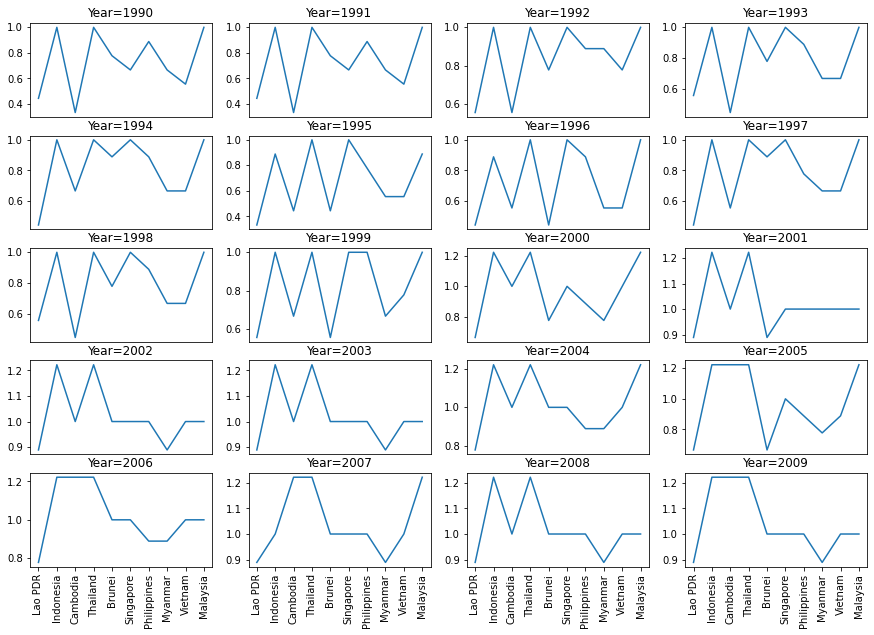

In [0]:
#d=nx.degree_centrality(Asean_subgraph[i])
from pylab import *
f = plt.figure(figsize=(15,10))
#fig3, ax = plt.subplots(5, 4,figsize=(28,15))

    #INPUT: examples_per_class: number of examples of each class you want to show
    # TODO: Your code here
    
    #gs1 = gridspec.GridSpec(4, 4)
    #gs1.update(wspace=0.0, hspace=0.0)
for i in range(20):
  f.add_subplot(5,4,i+1)
  d=nx.degree_centrality(Asean_subgraph[i])
  plot(range(len(d)), list(d.values()))
  xticks([])
  if(i>=16): 
    xticks(range(len(d)), list(d.keys()),rotation=90)
  plot_title='Year='+str(1990+i)
  title(plot_title)
            #ax[j,k].show()  
            #axeslist[eg][keys].plot(range(len(d)), list(d.values()))
            #axeslist[eg][keys].xticks(range(len(d)), list(d.keys()),rotation=90)
            #i=i+1
        ##axeslist[0][keys].title.set_text(dict_classes[keys])
 
    # End of your code
    
#visualize_images()
#plt.plot(range(len(d)), list(d.values()))
#plt.xticks(range(len(d)), list(d.keys()),rotation=90)

show()

In [0]:
Asean_list

['Singapore',
 'Thailand',
 'Myanmar',
 'Lao PDR',
 'Vietnam',
 'Brunei',
 'Philippines',
 'Malaysia',
 'Cambodia',
 'Indonesia']

In [0]:
#betweenness centrality is a measure of centrality in a graph based on shortest paths. .
# For example, in a telecommunications network, a node with higher betweenness centrality
# would have more control over the network, because more information will pass through that node.

asean_betweenness = []

for i in range(0,20):
  case_list = {}
  print(sorted(nx.betweenness_centrality(Asean_subgraph[i]).items(),key = lambda x:x[1],reverse = True))
  #print(nx.betweenness_centrality(Asean_subgraph[i]))
  asean_betweenness.append(nx.betweenness_centrality(Asean_subgraph[i]))

#consistent position by indonesia till in the first and second spot 1995 and overtook by Singapore ever since
#vietnam become much more prominent by the start of 2000 and has better control over the network than Indonesia


[('Indonesia', 0.09444444444444443), ('Thailand', 0.09444444444444443), ('Malaysia', 0.09444444444444443), ('Philippines', 0.03888888888888888), ('Brunei', 0.011111111111111112), ('Lao PDR', 0.0), ('Cambodia', 0.0), ('Singapore', 0.0), ('Myanmar', 0.0), ('Vietnam', 0.0)]
[('Indonesia', 0.09444444444444443), ('Thailand', 0.09444444444444443), ('Malaysia', 0.09444444444444443), ('Philippines', 0.03888888888888888), ('Brunei', 0.011111111111111112), ('Lao PDR', 0.0), ('Cambodia', 0.0), ('Singapore', 0.0), ('Myanmar', 0.0), ('Vietnam', 0.0)]
[('Indonesia', 0.04027777777777778), ('Thailand', 0.04027777777777778), ('Singapore', 0.04027777777777778), ('Malaysia', 0.04027777777777778), ('Philippines', 0.016666666666666666), ('Myanmar', 0.016666666666666666), ('Lao PDR', 0.0), ('Cambodia', 0.0), ('Brunei', 0.0), ('Vietnam', 0.0)]
[('Indonesia', 0.056018518518518516), ('Thailand', 0.056018518518518516), ('Singapore', 0.056018518518518516), ('Malaysia', 0.056018518518518516), ('Philippines', 0.02

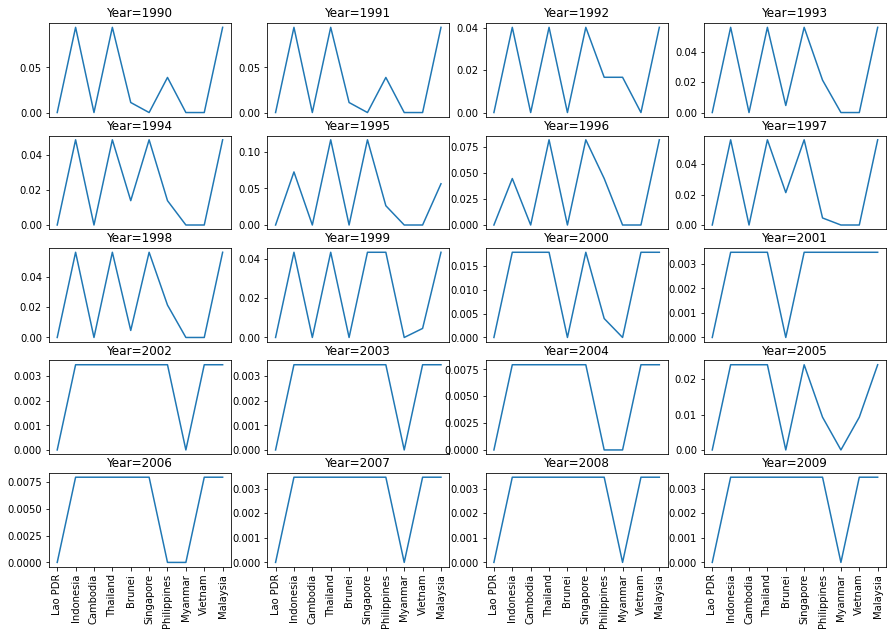

In [0]:
from pylab import *
f = plt.figure(figsize=(15,10))
#fig3, ax = plt.subplots(5, 4,figsize=(28,15))

    #INPUT: examples_per_class: number of examples of each class you want to show
    # TODO: Your code here
    
    #gs1 = gridspec.GridSpec(4, 4)
    #gs1.update(wspace=0.0, hspace=0.0)
for i in range(20):
  f.add_subplot(5,4,i+1)
  d=nx.betweenness_centrality(Asean_subgraph[i])
  plot(range(len(d)), list(d.values()))
  xticks([])
  if(i>=16): 
    xticks(range(len(d)), list(d.keys()),rotation=90)
  plot_title='Year='+str(1990+i)
  title(plot_title)
            #ax[j,k].show()  
            #axeslist[eg][keys].plot(range(len(d)), list(d.values()))
            #axeslist[eg][keys].xticks(range(len(d)), list(d.keys()),rotation=90)
            #i=i+1
        ##axeslist[0][keys].title.set_text(dict_classes[keys])
 
    # End of your code
    
#visualize_images()
#plt.plot(range(len(d)), list(d.values()))
#plt.xticks(range(len(d)), list(d.keys()),rotation=90)

show()

In [0]:
asean_betweenness

[{'Brunei': 0.011111111111111112,
  'Cambodia': 0.0,
  'Indonesia': 0.09444444444444443,
  'Lao PDR': 0.0,
  'Malaysia': 0.09444444444444443,
  'Myanmar': 0.0,
  'Philippines': 0.03888888888888888,
  'Singapore': 0.0,
  'Thailand': 0.09444444444444443,
  'Vietnam': 0.0},
 {'Brunei': 0.011111111111111112,
  'Cambodia': 0.0,
  'Indonesia': 0.09444444444444443,
  'Lao PDR': 0.0,
  'Malaysia': 0.09444444444444443,
  'Myanmar': 0.0,
  'Philippines': 0.03888888888888888,
  'Singapore': 0.0,
  'Thailand': 0.09444444444444443,
  'Vietnam': 0.0},
 {'Brunei': 0.0,
  'Cambodia': 0.0,
  'Indonesia': 0.04027777777777778,
  'Lao PDR': 0.0,
  'Malaysia': 0.04027777777777778,
  'Myanmar': 0.016666666666666666,
  'Philippines': 0.016666666666666666,
  'Singapore': 0.04027777777777778,
  'Thailand': 0.04027777777777778,
  'Vietnam': 0.0},
 {'Brunei': 0.004629629629629629,
  'Cambodia': 0.0,
  'Indonesia': 0.056018518518518516,
  'Lao PDR': 0.0,
  'Malaysia': 0.056018518518518516,
  'Myanmar': 0.0,
  'Ph

In [0]:
#In graph theory, eigenvector centrality (also called eigencentrality or prestige score) is a measure of the influence of a node in a network. 
#... A high eigenvector score means that a node is connected to many nodes who themselves have high scores.

In [0]:
asean_eigen = []

for i in range(0,20):
  case_list = {}
  print(sorted(nx.eigenvector_centrality(Asean_subgraph[i]).items(),key = lambda x:x[1],reverse = True))
  #print(nx.betweenness_centrality(Asean_subgraph[i]))
  asean_eigen.append(nx.eigenvector_centrality(Asean_subgraph[i]))

[('Malaysia', 0.3810724786163449), ('Indonesia', 0.38107247861634486), ('Thailand', 0.38107247861634486), ('Philippines', 0.36107561991418197), ('Brunei', 0.33476297357571483), ('Singapore', 0.30259483153714445), ('Myanmar', 0.30259483153714445), ('Vietnam', 0.25984107116330646), ('Lao PDR', 0.21254229017498671), ('Cambodia', 0.1615257714044793)]
[('Malaysia', 0.3810724786163449), ('Indonesia', 0.38107247861634486), ('Thailand', 0.38107247861634486), ('Philippines', 0.36107561991418197), ('Brunei', 0.33476297357571483), ('Singapore', 0.30259483153714445), ('Myanmar', 0.30259483153714445), ('Vietnam', 0.25984107116330646), ('Lao PDR', 0.21254229017498671), ('Cambodia', 0.1615257714044793)]
[('Indonesia', 0.3538231439050739), ('Thailand', 0.3538231439050739), ('Singapore', 0.3538231439050739), ('Malaysia', 0.3538231439050739), ('Philippines', 0.3286069689648326), ('Myanmar', 0.3286069689648326), ('Brunei', 0.30339079402459124), ('Vietnam', 0.30339079402459124), ('Lao PDR', 0.222687789793

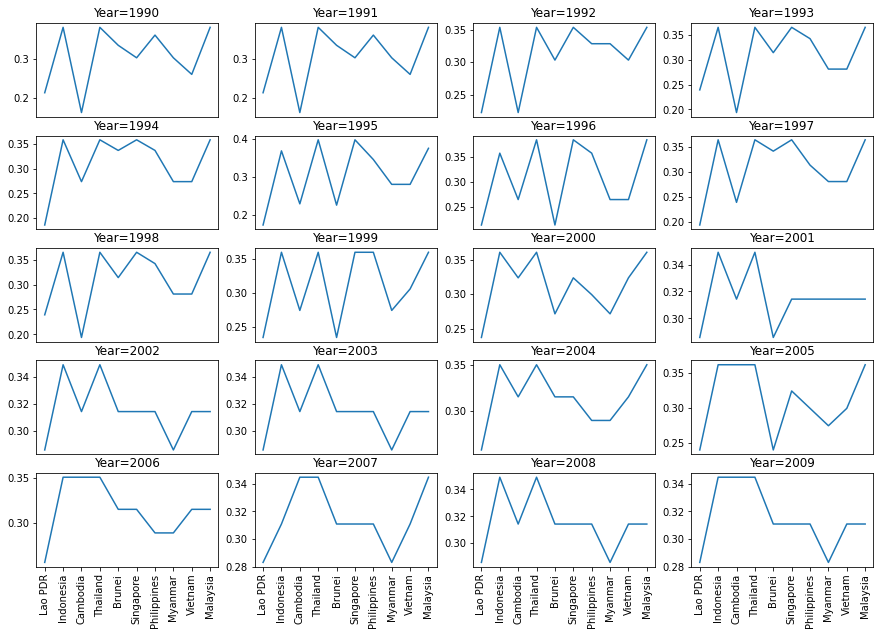

In [0]:
from pylab import *
f = plt.figure(figsize=(15,10))
#fig3, ax = plt.subplots(5, 4,figsize=(28,15))

    #INPUT: examples_per_class: number of examples of each class you want to show
    # TODO: Your code here
    
    #gs1 = gridspec.GridSpec(4, 4)
    #gs1.update(wspace=0.0, hspace=0.0)
for i in range(20):
  f.add_subplot(5,4,i+1)
  d=nx.eigenvector_centrality(Asean_subgraph[i])
  plot(range(len(d)), list(d.values()))
  xticks([])
  if(i>=16): 
    xticks(range(len(d)), list(d.keys()),rotation=90)
  plot_title='Year='+str(1990+i)
  title(plot_title)
            #ax[j,k].show()  
            #axeslist[eg][keys].plot(range(len(d)), list(d.values()))
            #axeslist[eg][keys].xticks(range(len(d)), list(d.keys()),rotation=90)
            #i=i+1
        ##axeslist[0][keys].title.set_text(dict_classes[keys])
 
    # End of your code
    
#visualize_images()
#plt.plot(range(len(d)), list(d.values()))
#plt.xticks(range(len(d)), list(d.keys()),rotation=90)

show()

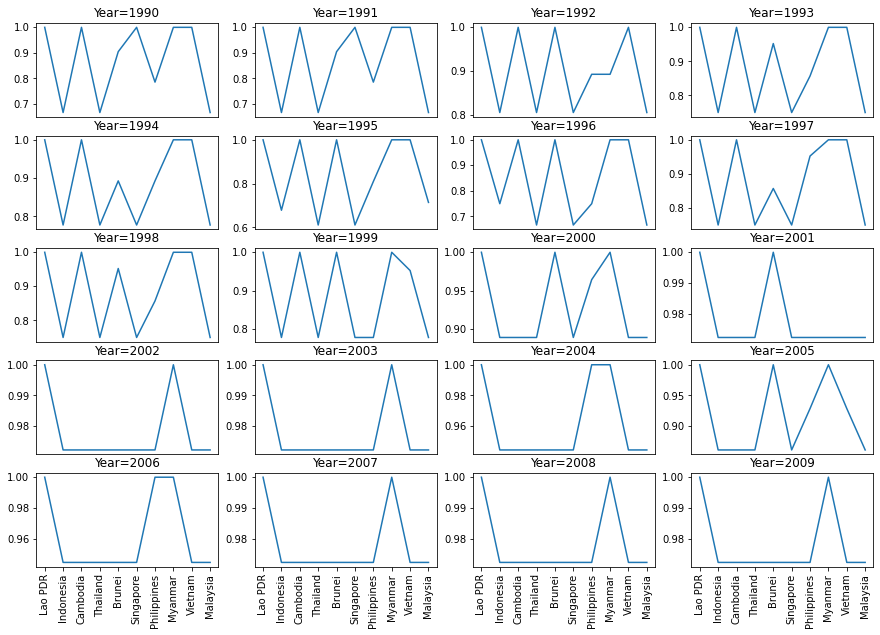

In [0]:
from pylab import *
f = plt.figure(figsize=(15,10))
#fig3, ax = plt.subplots(5, 4,figsize=(28,15))

    #INPUT: examples_per_class: number of examples of each class you want to show
    # TODO: Your code here
    
    #gs1 = gridspec.GridSpec(4, 4)
    #gs1.update(wspace=0.0, hspace=0.0)
for i in range(20):
  f.add_subplot(5,4,i+1)
  d=nx.clustering(Asean_subgraph[i])
  plot(range(len(d)), list(d.values()))
  xticks([])
  if(i>=16): 
    xticks(range(len(d)), list(d.keys()),rotation=90)
  plot_title='Year='+str(1990+i)
  title(plot_title)
            #ax[j,k].show()  
            #axeslist[eg][keys].plot(range(len(d)), list(d.values()))
            #axeslist[eg][keys].xticks(range(len(d)), list(d.keys()),rotation=90)
            #i=i+1
        ##axeslist[0][keys].title.set_text(dict_classes[keys])
 
    # End of your code
    
#visualize_images()
#plt.plot(range(len(d)), list(d.values()))
#plt.xticks(range(len(d)), list(d.keys()),rotation=90)

show()

In [0]:
asean_clus = []
#vg_shortest_path.append(nx.shortest_path_length(Asean_subgraph[i]))

for i in range(0,20):
  case_list = {}
  #print(sorted(nx.#vg_shortest_path.append(nx.shortest_path_length(Asean_subgraph[i]))(Asean_subgraph[i]).items(),key = lambda x:x[1],reverse = True))
  #print(nx.betweenness_centrality(Asean_subgraph[i]))
  asean_clus.append(nx.shortest_path_length(Asean_subgraph[i]))

In [0]:
asean_clus

[<generator object all_pairs_shortest_path_length at 0x7fc12715dd00>,
 <generator object all_pairs_shortest_path_length at 0x7fc12d28d678>,
 <generator object all_pairs_shortest_path_length at 0x7fc12d28d620>,
 <generator object all_pairs_shortest_path_length at 0x7fc12d28d728>,
 <generator object all_pairs_shortest_path_length at 0x7fc1271524c0>,
 <generator object all_pairs_shortest_path_length at 0x7fc127152468>,
 <generator object all_pairs_shortest_path_length at 0x7fc127152410>,
 <generator object all_pairs_shortest_path_length at 0x7fc1271523b8>,
 <generator object all_pairs_shortest_path_length at 0x7fc127152360>,
 <generator object all_pairs_shortest_path_length at 0x7fc127152308>,
 <generator object all_pairs_shortest_path_length at 0x7fc1271522b0>,
 <generator object all_pairs_shortest_path_length at 0x7fc127152258>,
 <generator object all_pairs_shortest_path_length at 0x7fc127152518>,
 <generator object all_pairs_shortest_path_length at 0x7fc127152570>,
 <generator object a

In [0]:
#matrix
no_of_nodes = []
no_of_edges = []
dens = []
avg_degree = []
avg_shortest_path = []
avg_clustering_coefficient = []
clustering_coefficient = []
diameter_value = []
eigen_vector_value = []
for i in range(0,20):
  # print number of nodes
  print("Number of Nodes: for Asean trade"+str(1990+i), nx.number_of_nodes(Asean_subgraph[i]))
  no_of_nodes.append(nx.number_of_nodes(Asean_subgraph[i]))
  # print number of edges
  print("Number of Edges: for Asean trade "+str(1990+i), nx.number_of_edges(Asean_subgraph[i]))
  no_of_edges.append(nx.number_of_edges(Asean_subgraph[i]))
  # print density of network
  print("Density: for Asean trade "+str(1990+i), nx.density(Asean_subgraph[i]))
  dens.append(nx.density(Asean_subgraph[i]))
  # Average degree
  print("Average Degree: for Asean trade "+str(1990+i), 2*nx.number_of_edges(Asean_subgraph[i]) / float(nx.number_of_nodes(Asean_subgraph[i])))
  avg_degree.append(2*nx.number_of_edges(Asean_subgraph[i]) / float(nx.number_of_nodes(Asean_subgraph[i])))
  # print average shortest path length
  print("Average Shortest Path Length: for Asean trade "+str(1990+i), nx.average_shortest_path_length(Asean_subgraph[i]))
  avg_shortest_path.append(nx.average_shortest_path_length(Asean_subgraph[i]))
  # print average clustering coefficient
  print("Average Clustering Coefficient: for Asean trade "+str(1990+i), nx.average_clustering(Asean_subgraph[i]))
  avg_clustering_coefficient.append(nx.average_clustering(Asean_subgraph[i]))
  #print clustering coefficient
  print("Clustering Coefficient: for Asean trade "+str(1990+i), nx.clustering(Asean_subgraph[i]))
  clustering_coefficient.append(nx.clustering(Asean_subgraph[i]))
  #print diameter
  print("Diameter: for Asean trade "+str(1990+i), nx.diameter(Asean_subgraph[i]))
  diameter_value.append(nx.diameter(Asean_subgraph[i]))
  print("Eigen vector : for Asean trade nodes "+str(1990+i), nx.eigenvector_centrality(Asean_subgraph[i]))
  eigen_vector_value.append(nx.eigenvector_centrality(Asean_subgraph[i]))

Number of Nodes: for Asean trade1990 10
Number of Edges: for Asean trade 1990 33
Density: for Asean trade 1990 0.7333333333333333
Average Degree: for Asean trade 1990 6.6
Average Shortest Path Length: for Asean trade 1990 1.2666666666666666
Average Clustering Coefficient: for Asean trade 1990 0.869047619047619
Clustering Coefficient: for Asean trade 1990 {'Lao PDR': 1.0, 'Indonesia': 0.6666666666666666, 'Cambodia': 1.0, 'Thailand': 0.6666666666666666, 'Brunei': 0.9047619047619048, 'Singapore': 1.0, 'Philippines': 0.7857142857142857, 'Myanmar': 1.0, 'Vietnam': 1.0, 'Malaysia': 0.6666666666666666}
Diameter: for Asean trade 1990 2
Eigen vector : for Asean trade nodes 1990 {'Lao PDR': 0.21254229017498671, 'Indonesia': 0.38107247861634486, 'Cambodia': 0.1615257714044793, 'Thailand': 0.38107247861634486, 'Brunei': 0.33476297357571483, 'Singapore': 0.30259483153714445, 'Philippines': 0.36107561991418197, 'Myanmar': 0.30259483153714445, 'Vietnam': 0.25984107116330646, 'Malaysia': 0.38107247861

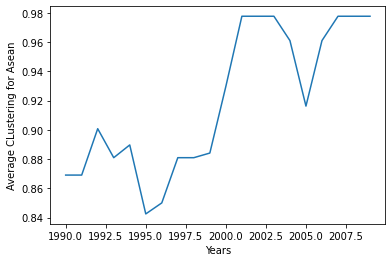

In [0]:

plt.plot(list_of_years,avg_clustering_coefficient)
plt.xlabel('Years')
plt.ylabel('Average CLustering for Asean')
plt.show()


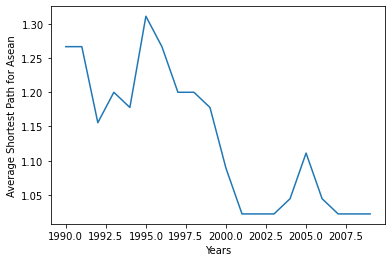

In [0]:
plt.plot( list_of_years,avg_shortest_path)
plt.xlabel('Years')
plt.ylabel('Average Shortest Path for Asean')
plt.show()


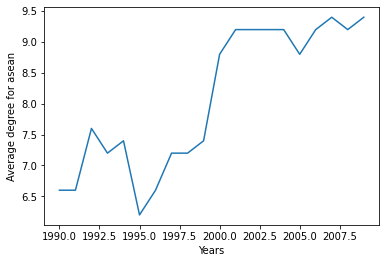

In [0]:

plt.plot( list_of_years,avg_degree)
plt.xlabel('Years')
plt.ylabel('Average degree for asean')
plt.show()

In [0]:
#LOUVIAN COMMUNITY DETECTION BASED ON MODULARITY

In [0]:
#Louvain Modularity
#Before defining the Louvain method, it is important to introduce
# the notion of modularity. Modularity is a measure of how well groups have been partitioned into clusters :

#The pseudo-code of the Louvain method is the following :
#Assign a community to each node at first
#Alternate the next 2 steps until convergence :
#Create a new community with neighboring nodes to maximize modularity
#Create a new weighted graph. Communities of the previous step become nodes of the graph




![alt text](https://miro.medium.com/max/1400/1*uIbbKwJw4lo5dwz4VF9hKA.png)

In [0]:

import community
from collections import Counter
#Lovian algorithm
# Starting with an initial partition of the graph and running the Louvain algorithm for Community Detection
def Lovian_Community_Detection(G):
    partition=community.best_partition(G, weight='MsgCount')
    print('Completed Louvain algorithm .. . . ' )
    values=[partition.get(node) for node in G.nodes()]
    list_com=partition.values()

        # Creating a dictionary like {community_number:list_of_participants}
    dict_nodes={}
    community_num = []
        # Populating the dictionary with items
    for each_item in partition.items():
        community_num=each_item[1]
        community_node=each_item[0]
        if community_num in dict_nodes:
            value=dict_nodes.get(community_num) + ' | ' + str(community_node)
            dict_nodes.update({community_num:value})
        else:
            dict_nodes.update({community_num:community_node})
    print('lenght of cit_nodes')
    print(len(dict_nodes))
    print(dict_nodes)

        # Creating a dataframe from the diet, and getting the output into excel
    community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Members'])
    community_df.index.rename('Community_Num' , inplace=True)
    community_df.to_csv('Community_List_snippet.csv')
    print(community_df)

        # Creating a new graph to represent the communities created by the Louvain algorithm
    import matplotlib
    matplotlib.rcParams['figure.figsize']= [12, 8]
    G_comm=nx.Graph()
    #G_comm = nx.DiGraph()

        # Populating the data from the node dictionary created earlier
    G_comm.add_nodes_from(dict_nodes)

        # Calculating modularity and the total number of communities
    mod=community.modularity(partition,G)
    print("Modularity: ", mod)
    print("Total number of Communities=", len(G_comm.nodes()))

        # Creating the Graph and also calculating Modularity
    matplotlib.rcParams['figure.figsize']= [12, 8]
    pos_louvain=nx.spring_layout(G_comm)
    colors = range(20)

    
 
    nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=640,font_size=10,label='Modularity =' + str(round(mod,3)) +
                       ', Communities=' + str(len(G_comm.nodes())),node_color='#A0CBE2',edgelist = G_comm.edges,edge_color = colors,linewidths = 10,width =100,alpha =1,
                     edge_cmap = plt.cm.Blues)
    #nx.draw(G_comm,  node_color='#A0CBE2', edge_color=colors,
      #  width=4, edge_cmap=plt.cm.Blues, with_labels=True,label='Modularity =' + str(round(mod,3)) +
       #                 ', Communities=' + str(len(G_comm.nodes())))
    plt.suptitle('Community structure (Louvain Algorithm)',fontsize=22,fontname='DejaVu Sans')
    plt.box(on=None)
    plt.axis('off')
    plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
    plt.savefig('louvain.png',dpi=400, bbox_inches='tight') 
    pd.set_option('display.max_colwidth',1000)
    pd.options.display.max_seq_items = 4000
    print(community_df.T)

Completed Louvain algorithm .. . . 
lenght of cit_nodes
4
{0: 'Lao PDR | Brunei | Singapore | Philippines | Myanmar | Vietnam | Malaysia', 1: 'Indonesia', 2: 'Cambodia', 3: 'Thailand'}
                                                                                 Members
Community_Num                                                                           
0              Lao PDR | Brunei | Singapore | Philippines | Myanmar | Vietnam | Malaysia
1                                                                              Indonesia
2                                                                               Cambodia
3                                                                               Thailand
Modularity:  0.027161611588954283
Total number of Communities= 4
Community_Num                                                                          0  ...         3
Members        Lao PDR | Brunei | Singapore | Philippines | Myanmar | Vietnam | Malaysia  ...  Thailand

[1 rows

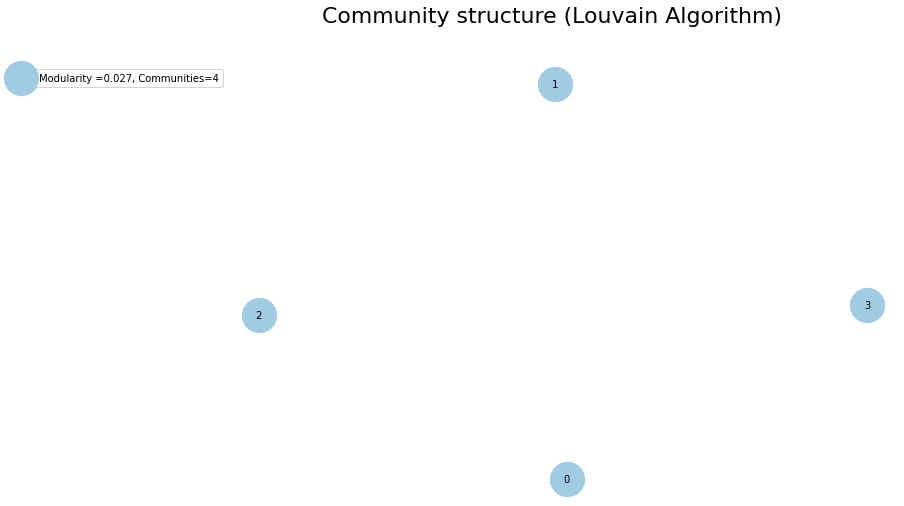

In [0]:
Lovian_Community_Detection(Asean_subgraph[19])

Completed Louvain algorithm .. . . 
                                                                      Members
Community_Num                                                                
0              Lao PDR | Indonesia | Cambodia | Thailand | Vietnam | Malaysia
1                                  Brunei | Singapore | Philippines | Myanmar
Modularity:  0.028925619834710675
Total number of Communities= 2
Community_Num                                                               0                                           1
Members        Lao PDR | Indonesia | Cambodia | Thailand | Vietnam | Malaysia  Brunei | Singapore | Philippines | Myanmar
Completed Louvain algorithm .. . . 
                                                                      Members
Community_Num                                                                
0              Lao PDR | Indonesia | Cambodia | Thailand | Vietnam | Malaysia
1                                  Brunei | Singapore | Philippines | Mya

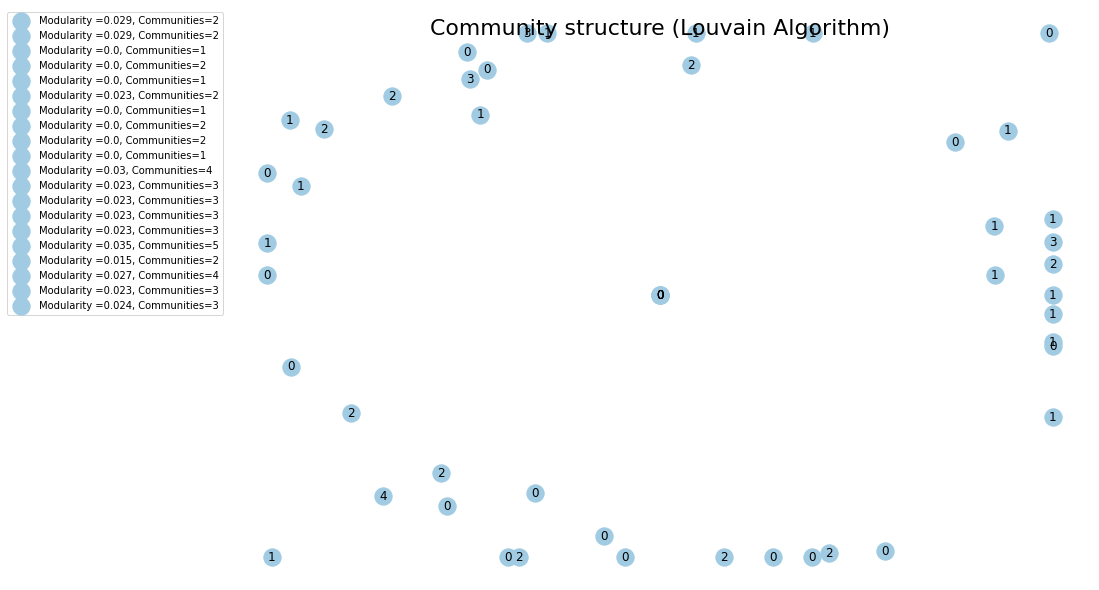

In [0]:
for i in range(0,20):
  Lovian_Community_Detection(Asean_subgraph[i])

#Within ASEAN significant development of communities are taking place with the increase of number of intra asean communities from 2 to 4
#High modularity indicate strong community links and stronger trade networks within asean

Completed Louvain algorithm .. . . 
                                                                                 Members
Community_Num                                                                           
0              Lao PDR | Brunei | Singapore | Philippines | Myanmar | Vietnam | Malaysia
1                                                                              Indonesia
2                                                                               Cambodia
3                                                                               Thailand
Modularity:  0.027161611588954283
Total number of Communities= 4
Community_Num                                                                          0  ...         3
Members        Lao PDR | Brunei | Singapore | Philippines | Myanmar | Vietnam | Malaysia  ...  Thailand

[1 rows x 4 columns]


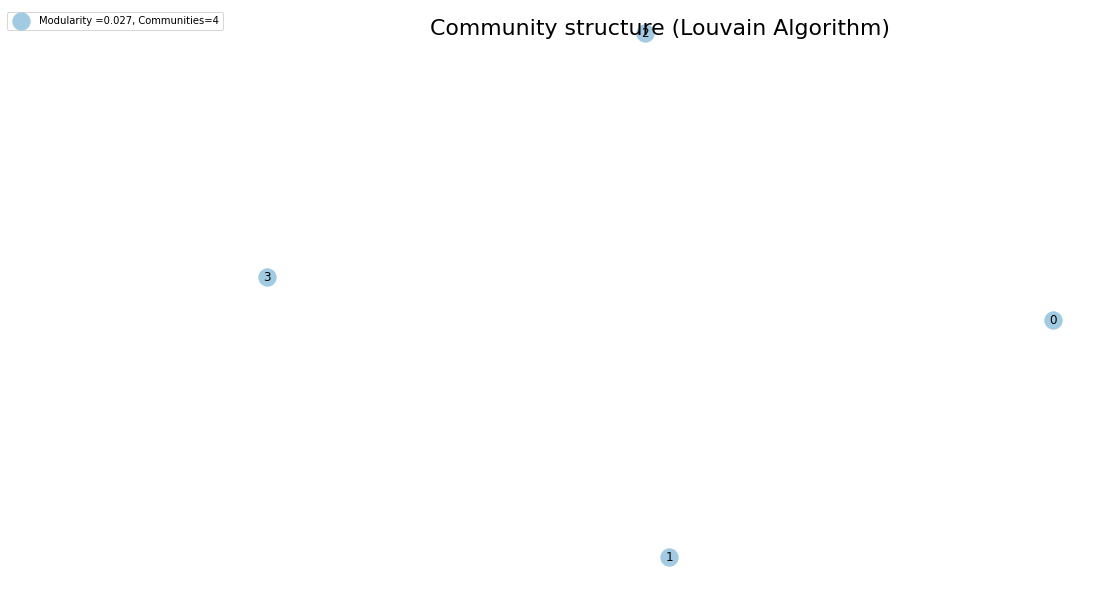

In [0]:
Lovian_Community_Detection(Asean_subgraph[19])

In [0]:
from networkx.algorithms.community.centrality import girvan_newman

In [0]:
#Louvain Modularity
#Before defining the Louvain method, it is important to introduce
# the notion of modularity. Modularity is a measure of how well groups have been partitioned into clusters :

#The pseudo-code of the Louvain method is the following :
#Assign a community to each node at first
#Alternate the next 2 steps until convergence :
#Create a new community with neighboring nodes to maximize modularity
#Create a new weighted graph. Communities of the previous step become nodes of the graph




GIRVAN NEWMAN ALGORITHM FOR COMMUNITY DETECTION

In [0]:
#Among the approaches that determine the graph communities by breaking it into smaller parts, an important
#role plays the Girvan-Newman algorithm described first
#in [5]. It is based on successive deletion of edges which
#have the maximum edge betweenness centrality which is
#the quantity measuring the frequency of appearance of an
#edge on geodesic paths in a graph. 


#The idea was to find which edges in a network occur most frequently between other pairs
# of nodes by finding edges betweenness. The edges joining communities are then expected to have high edge betweenness. 
#The underlying community structure of the network will be much fine-grained once we eliminate edges with high edge betweenness.
# For the removal of each edge, the calculation of edge betweenness is O(EN); therefore, this algorithm’s time complexity is O(E^2N).

In [0]:
import itertools  
from networkx.algorithms import community
k=1
for i in range(1990,2010):
  comp = community.girvan_newman(Asean_subgraph[i-1990])
  for communities in itertools.islice(comp, k):
    print('Community in year',i)
    print(tuple(sorted(c) for c in communities))
  

Community in year 1990
(['Brunei', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'], ['Cambodia'])
Community in year 1991
(['Brunei', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'], ['Cambodia'])
Community in year 1992
(['Lao PDR'], ['Brunei', 'Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'])
Community in year 1993
(['Brunei', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'], ['Cambodia'])
Community in year 1994
(['Lao PDR'], ['Brunei', 'Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'])
Community in year 1995
(['Lao PDR'], ['Brunei', 'Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'])
Community in year 1996
(['Lao PDR'], ['Brunei', 'Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', '

In [0]:
import community
k=1
for i in range(1990,2010):
  comp = girvan_newman(Asean_subgraph[i-1990])
  for communities in itertools.islice(comp, k):
    print('Community in year',i)
    print(tuple(sorted(c) for c in communities))

Community in year 1990
(['Brunei', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'], ['Cambodia'])
Community in year 1991
(['Brunei', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'], ['Cambodia'])
Community in year 1992
(['Lao PDR'], ['Brunei', 'Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'])
Community in year 1993
(['Brunei', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'], ['Cambodia'])
Community in year 1994
(['Lao PDR'], ['Brunei', 'Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'])
Community in year 1995
(['Lao PDR'], ['Brunei', 'Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'])
Community in year 1996
(['Lao PDR'], ['Brunei', 'Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', '

In [0]:
#SAARC

In [0]:
Saarc_list

['India', 'Pakistan', 'Nepal', 'Bhutan', 'Myanmar', 'Sri Lanka', 'Maldives']

In [0]:
degree_deviation_saarc = []
degree_saarc_yearwise = []
for j in range(0,20):
  degree_deviation_saarc = []
  for i in range(len(Saarc_list)):
    print(graph_list[j].degree[Saarc_list[i]],"  ",Saarc_list[i]," ", list_of_years[j])
    degree_deviation_saarc.append(graph_list[j].degree[Saarc_list[i]])
  degree_saarc_yearwise.append(degree_deviation_saarc)
#degree_deviation_Saarc

146    India   1990
147    Pakistan   1990
79    Nepal   1990
26    Bhutan   1990
57    Myanmar   1990
129    Sri Lanka   1990
33    Maldives   1990
139    India   1991
153    Pakistan   1991
72    Nepal   1991
40    Bhutan   1991
63    Myanmar   1991
133    Sri Lanka   1991
33    Maldives   1991
144    India   1992
151    Pakistan   1992
73    Nepal   1992
44    Bhutan   1992
114    Myanmar   1992
128    Sri Lanka   1992
36    Maldives   1992
162    India   1993
165    Pakistan   1993
78    Nepal   1993
44    Bhutan   1993
69    Myanmar   1993
142    Sri Lanka   1993
35    Maldives   1993
167    India   1994
106    Pakistan   1994
89    Nepal   1994
46    Bhutan   1994
66    Myanmar   1994
156    Sri Lanka   1994
41    Maldives   1994
170    India   1995
171    Pakistan   1995
75    Nepal   1995
38    Bhutan   1995
76    Myanmar   1995
117    Sri Lanka   1995
65    Maldives   1995
168    India   1996
172    Pakistan   1996
85    Nepal   1996
33    Bhutan   1996
75    Myanmar   1996
12

In [0]:
#List of degree of Saarc countries from 1990-2010 
print('Countries in Saarc',Saarc_list)
print('List of year analyzed',list_of_years)
print('Degree distribution across years for each country',degree_saarc_yearwise)

Countries in Saarc ['India', 'Pakistan', 'Nepal', 'Bhutan', 'Myanmar', 'Sri Lanka', 'Maldives']
List of year analyzed [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
Degree distribution across years for each country [[146, 147, 79, 26, 57, 129, 33], [139, 153, 72, 40, 63, 133, 33], [144, 151, 73, 44, 114, 128, 36], [162, 165, 78, 44, 69, 142, 35], [167, 106, 89, 46, 66, 156, 41], [170, 171, 75, 38, 76, 117, 65], [168, 172, 85, 33, 75, 126, 68], [174, 178, 91, 49, 80, 130, 74], [177, 173, 94, 52, 87, 129, 72], [185, 180, 95, 40, 94, 166, 71], [193, 194, 109, 48, 97, 168, 82], [197, 195, 97, 55, 115, 170, 90], [200, 194, 108, 50, 113, 177, 86], [203, 196, 121, 50, 105, 176, 92], [211, 205, 107, 52, 109, 181, 92], [213, 224, 106, 71, 103, 176, 90], [217, 217, 118, 79, 104, 184, 101], [220, 223, 122, 77, 105, 188, 104], [224, 220, 116, 87, 109, 191, 101], [220, 221, 166, 81, 118, 192, 98]]


In [0]:
Saarc_subgraph= []
for i in range(0,20):
  Saarc_subgraph.append('Saarc_'+str(1990+i))
Saarc_subgraph


['Saarc_1990',
 'Saarc_1991',
 'Saarc_1992',
 'Saarc_1993',
 'Saarc_1994',
 'Saarc_1995',
 'Saarc_1996',
 'Saarc_1997',
 'Saarc_1998',
 'Saarc_1999',
 'Saarc_2000',
 'Saarc_2001',
 'Saarc_2002',
 'Saarc_2003',
 'Saarc_2004',
 'Saarc_2005',
 'Saarc_2006',
 'Saarc_2007',
 'Saarc_2008',
 'Saarc_2009']

In [0]:
for i in range(0,20):
  Saarc_subgraph[i] = graph_list[i].subgraph(Saarc_list)

In [0]:
for i in range(0,20):
  print(sorted(nx.degree_centrality(Saarc_subgraph[i]).items(),key = lambda x:x[1],reverse = True))

#Surprising results shows pakistan with highest degree centrality -> reason --> import based economy unlike unlike India which is a domestically
#self sufficient economy

[('Pakistan', 1.0), ('India', 1.0), ('Sri Lanka', 0.8333333333333333), ('Nepal', 0.6666666666666666), ('Myanmar', 0.6666666666666666), ('Maldives', 0.5), ('Bhutan', 0.3333333333333333)]
[('Pakistan', 1.0), ('India', 1.0), ('Sri Lanka', 0.8333333333333333), ('Maldives', 0.5), ('Nepal', 0.5), ('Myanmar', 0.5), ('Bhutan', 0.3333333333333333)]
[('Pakistan', 1.0), ('India', 1.0), ('Sri Lanka', 0.8333333333333333), ('Maldives', 0.6666666666666666), ('Nepal', 0.6666666666666666), ('Myanmar', 0.6666666666666666), ('Bhutan', 0.5)]
[('Sri Lanka', 1.0), ('Pakistan', 1.0), ('India', 1.0), ('Nepal', 0.8333333333333333), ('Maldives', 0.6666666666666666), ('Bhutan', 0.6666666666666666), ('Myanmar', 0.5)]
[('India', 1.0), ('Sri Lanka', 0.8333333333333333), ('Nepal', 0.8333333333333333), ('Myanmar', 0.5), ('Pakistan', 0.5), ('Maldives', 0.3333333333333333), ('Bhutan', 0.3333333333333333)]
[('Pakistan', 1.0), ('India', 1.0), ('Nepal', 0.8333333333333333), ('Sri Lanka', 0.6666666666666666), ('Maldives', 

In [0]:
Saarc_list

['India', 'Pakistan', 'Nepal', 'Bhutan', 'Myanmar', 'Sri Lanka', 'Maldives']

In [0]:
Saarc_betweenness = []

for i in range(0,20):
  print(sorted(nx.betweenness_centrality(Saarc_subgraph[i]).items(),key = lambda x:x[1],reverse = True))
  #print(nx.betweenness_centrality(Saarc_subgraph[i]))
  Saarc_betweenness.append(nx.betweenness_centrality(Saarc_subgraph[i]))

#


[('Pakistan', 0.17777777777777776), ('India', 0.17777777777777776), ('Sri Lanka', 0.04444444444444444), ('Maldives', 0.0), ('Nepal', 0.0), ('Bhutan', 0.0), ('Myanmar', 0.0)]
[('Pakistan', 0.2), ('India', 0.2), ('Sri Lanka', 0.06666666666666667), ('Maldives', 0.0), ('Nepal', 0.0), ('Bhutan', 0.0), ('Myanmar', 0.0)]
[('Pakistan', 0.1333333333333333), ('India', 0.1333333333333333), ('Sri Lanka', 0.04444444444444444), ('Nepal', 0.02222222222222222), ('Maldives', 0.0), ('Bhutan', 0.0), ('Myanmar', 0.0)]
[('Sri Lanka', 0.08333333333333333), ('Pakistan', 0.08333333333333333), ('India', 0.08333333333333333), ('Nepal', 0.016666666666666666), ('Maldives', 0.0), ('Bhutan', 0.0), ('Myanmar', 0.0)]
[('India', 0.28888888888888886), ('Sri Lanka', 0.1222222222222222), ('Nepal', 0.1222222222222222), ('Maldives', 0.0), ('Bhutan', 0.0), ('Myanmar', 0.0), ('Pakistan', 0.0)]
[('Pakistan', 0.1111111111111111), ('India', 0.1111111111111111), ('Nepal', 0.06111111111111111), ('Sri Lanka', 0.016666666666666666)

In [0]:
Saarc_betweenness

[{'Bhutan': 0.0,
  'India': 0.17777777777777776,
  'Maldives': 0.0,
  'Myanmar': 0.0,
  'Nepal': 0.0,
  'Pakistan': 0.17777777777777776,
  'Sri Lanka': 0.04444444444444444},
 {'Bhutan': 0.0,
  'India': 0.2,
  'Maldives': 0.0,
  'Myanmar': 0.0,
  'Nepal': 0.0,
  'Pakistan': 0.2,
  'Sri Lanka': 0.06666666666666667},
 {'Bhutan': 0.0,
  'India': 0.1333333333333333,
  'Maldives': 0.0,
  'Myanmar': 0.0,
  'Nepal': 0.02222222222222222,
  'Pakistan': 0.1333333333333333,
  'Sri Lanka': 0.04444444444444444},
 {'Bhutan': 0.0,
  'India': 0.08333333333333333,
  'Maldives': 0.0,
  'Myanmar': 0.0,
  'Nepal': 0.016666666666666666,
  'Pakistan': 0.08333333333333333,
  'Sri Lanka': 0.08333333333333333},
 {'Bhutan': 0.0,
  'India': 0.28888888888888886,
  'Maldives': 0.0,
  'Myanmar': 0.0,
  'Nepal': 0.1222222222222222,
  'Pakistan': 0.0,
  'Sri Lanka': 0.1222222222222222},
 {'Bhutan': 0.0,
  'India': 0.1111111111111111,
  'Maldives': 0.016666666666666666,
  'Myanmar': 0.016666666666666666,
  'Nepal': 0.0

In [0]:
#matrix
no_of_nodes = []
no_of_edges = []
dens = []
avg_degree = []
avg_shortest_path = []
avg_clustering_coefficient = []
clustering_coefficient = []
diameter_value = []
eigen_vector_value = []
for i in range(0,20):
  # print number of nodes
  print("Number of Nodes: for Saarc trade"+str(1990+i), nx.number_of_nodes(Saarc_subgraph[i]))
  no_of_nodes.append(nx.number_of_nodes(Saarc_subgraph[i]))
  # print number of edges
  print("Number of Edges: for Saarc trade "+str(1990+i), nx.number_of_edges(Saarc_subgraph[i]))
  no_of_edges.append(nx.number_of_edges(Saarc_subgraph[i]))
  # print density of network
  print("Density: for Saarc trade "+str(1990+i), nx.density(Saarc_subgraph[i]))
  dens.append(nx.density(Saarc_subgraph[i]))
  # Average degree
  print("Average Degree: for Saarc trade "+str(1990+i), 2*nx.number_of_edges(Saarc_subgraph[i]) / float(nx.number_of_nodes(Saarc_subgraph[i])))
  avg_degree.append(2*nx.number_of_edges(Saarc_subgraph[i]) / float(nx.number_of_nodes(Saarc_subgraph[i])))
  # print average shortest path length
  print("Average Shortest Path Length: for Saarc trade "+str(1990+i), nx.average_shortest_path_length(Saarc_subgraph[i]))
  avg_shortest_path.append(nx.average_shortest_path_length(Saarc_subgraph[i]))
  # print average clustering coefficient
  print("Average Clustering Coefficient: for Saarc trade "+str(1990+i), nx.average_clustering(Saarc_subgraph[i]))
  avg_clustering_coefficient.append(nx.average_clustering(Saarc_subgraph[i]))
  #print clustering coefficient
  print("Clustering Coefficient: for Saarc trade "+str(1990+i), nx.clustering(Saarc_subgraph[i]))
  clustering_coefficient.append(nx.clustering(Saarc_subgraph[i]))
  #print diameter
  print("Diameter: for Saarc trade "+str(1990+i), nx.diameter(Saarc_subgraph[i]))
  diameter_value.append(nx.diameter(Saarc_subgraph[i]))
  print("Eigen vector : for Saarc trade nodes "+str(1990+i), nx.eigenvector_centrality(Saarc_subgraph[i]))
  eigen_vector_value.append(nx.eigenvector_centrality(Saarc_subgraph[i]))

Number of Nodes: for Saarc trade1990 7
Number of Edges: for Saarc trade 1990 15
Density: for Saarc trade 1990 0.7142857142857143
Average Degree: for Saarc trade 1990 4.285714285714286
Average Shortest Path Length: for Saarc trade 1990 1.2857142857142858
Average Clustering Coefficient: for Saarc trade 1990 0.857142857142857
Clustering Coefficient: for Saarc trade 1990 {'Sri Lanka': 0.8, 'Maldives': 1.0, 'Nepal': 1.0, 'Bhutan': 1.0, 'Myanmar': 1.0, 'Pakistan': 0.6, 'India': 0.6}
Diameter: for Saarc trade 1990 2
Eigen vector : for Saarc trade nodes 1990 {'Sri Lanka': 0.4232323852379885, 'Maldives': 0.29082524499576995, 'Nepal': 0.3713901175977662, 'Bhutan': 0.19901421195028762, 'Myanmar': 0.3713901175977662, 'Pakistan': 0.4587085836902085, 'India': 0.4587085836902085}
Number of Nodes: for Saarc trade1991 7
Number of Edges: for Saarc trade 1991 14
Density: for Saarc trade 1991 0.6666666666666666
Average Degree: for Saarc trade 1991 4.0
Average Shortest Path Length: for Saarc trade 1991 1.3

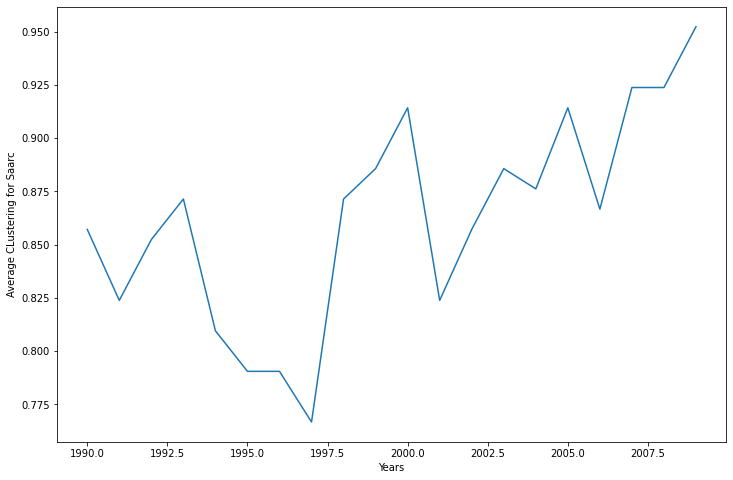

In [0]:

plt.plot(list_of_years,avg_clustering_coefficient)
plt.xlabel('Years')
plt.ylabel('Average CLustering for Saarc')
plt.show()


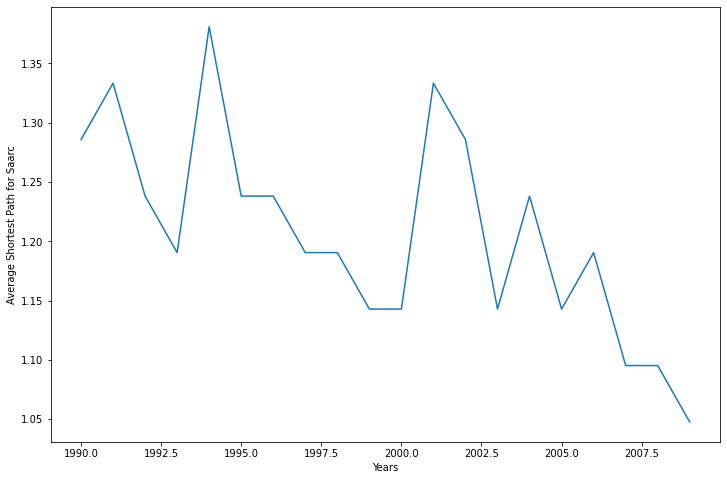

In [0]:
plt.plot( list_of_years,avg_shortest_path)
plt.xlabel('Years')
plt.ylabel('Average Shortest Path for Saarc')
plt.show()


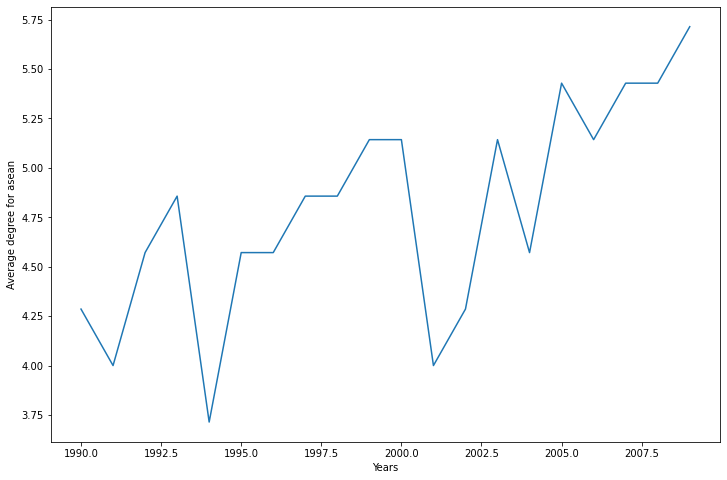

In [0]:

plt.plot( list_of_years,avg_degree)
plt.xlabel('Years')
plt.ylabel('Average degree for asean')
plt.show()

In [0]:
#Community detection in both saarc and asean

Completed Louvain algorithm .. . . 
                                            Members
Community_Num                                      
0                       Sri Lanka | Nepal | Myanmar
1              Maldives | Bhutan | Pakistan | India
Modularity:  0.024444444444444463
Total number of Communities= 2
Community_Num                            0                                     1
Members        Sri Lanka | Nepal | Myanmar  Maldives | Bhutan | Pakistan | India
Completed Louvain algorithm .. . . 
                                                                          Members
Community_Num                                                                    
0              Sri Lanka | Maldives | Nepal | Bhutan | Myanmar | Pakistan | India
Modularity:  0.0
Total number of Communities= 1
Community_Num                                                                   0
Members        Sri Lanka | Maldives | Nepal | Bhutan | Myanmar | Pakistan | India
Completed Louvain algorithm .. . . 

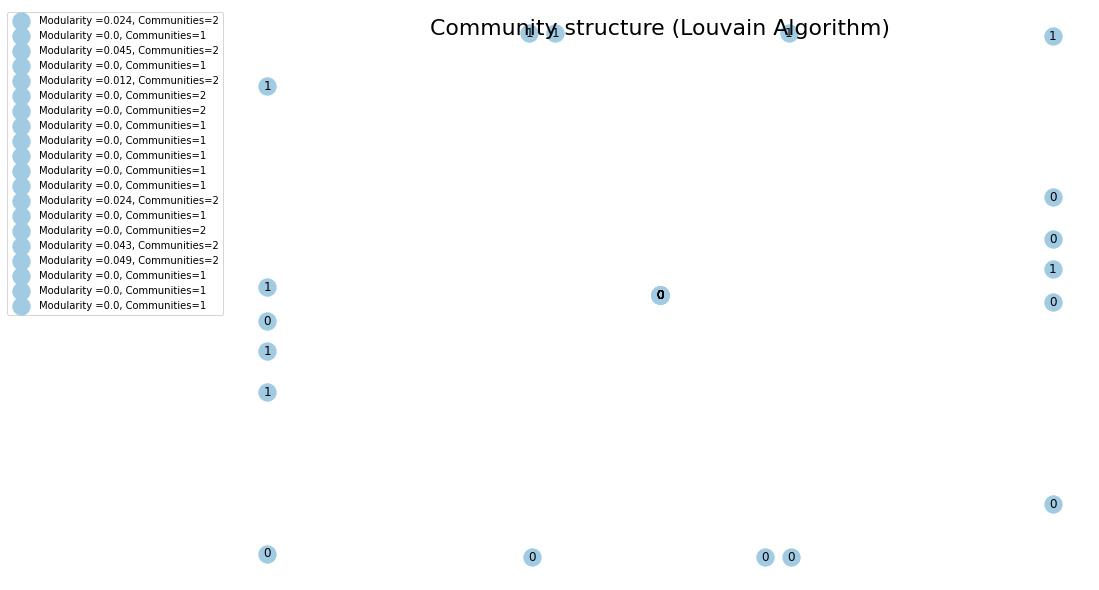

In [0]:
import community
for i in range(0,20):
  Lovian_Community_Detection(Saarc_subgraph[i])

#Intra saarc clustering has struggled throughout the years ,may be due to geopolitical differences and is evident in the community numbers 
#hovering around 2 from 1990-2010
#modularity hovering around 0 indicate a very weak community structure 

In [0]:
import community
k=1
for i in range(1990,2010):
  comp = girvan_newman(Saarc_subgraph[i-1990])
  for communities in itertools.islice(comp, k):
    print('Community in year',i)
    print(tuple(sorted(c) for c in communities))

Community in year 1990
(['India', 'Maldives', 'Myanmar', 'Nepal', 'Pakistan', 'Sri Lanka'], ['Bhutan'])
Community in year 1991
(['India', 'Maldives', 'Myanmar', 'Nepal', 'Pakistan', 'Sri Lanka'], ['Bhutan'])
Community in year 1992
(['India', 'Maldives', 'Myanmar', 'Nepal', 'Pakistan', 'Sri Lanka'], ['Bhutan'])
Community in year 1993
(['Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'], ['Myanmar'])
Community in year 1994
(['Bhutan', 'India', 'Myanmar', 'Nepal', 'Pakistan', 'Sri Lanka'], ['Maldives'])
Community in year 1995
(['India', 'Maldives', 'Myanmar', 'Nepal', 'Pakistan', 'Sri Lanka'], ['Bhutan'])
Community in year 1996
(['India', 'Maldives', 'Myanmar', 'Nepal', 'Pakistan', 'Sri Lanka'], ['Bhutan'])
Community in year 1997
(['Sri Lanka'], ['Bhutan', 'India', 'Maldives', 'Myanmar', 'Nepal', 'Pakistan'])
Community in year 1998
(['India', 'Maldives', 'Myanmar', 'Nepal', 'Pakistan', 'Sri Lanka'], ['Bhutan'])
Community in year 1999
(['India', 'Maldives', 'Myanmar', 'Nepal'

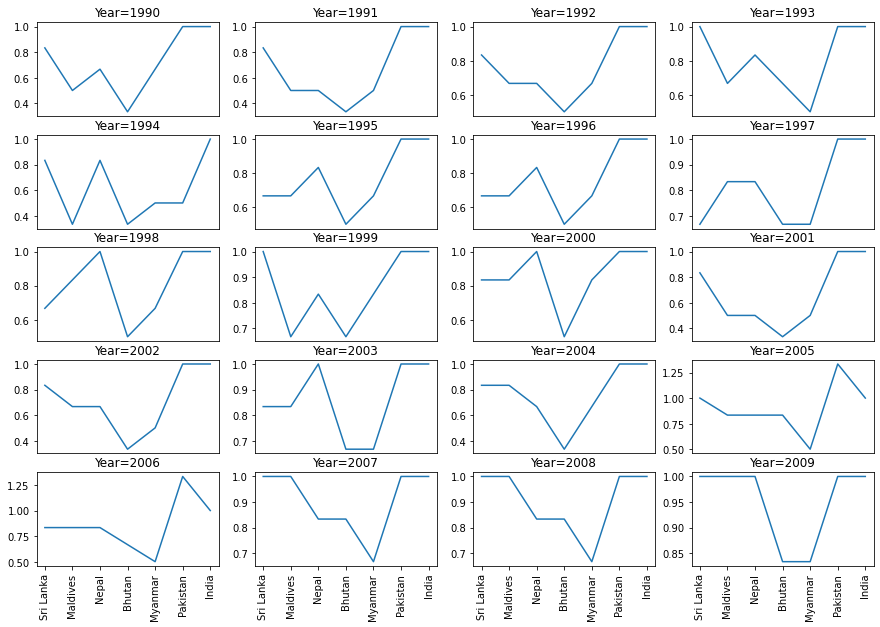

In [0]:
#d=nx.degree_centrality(Asean_subgraph[i])
from pylab import *
f = plt.figure(figsize=(15,10))
#fig3, ax = plt.subplots(5, 4,figsize=(28,15))

    #INPUT: examples_per_class: number of examples of each class you want to show
    # TODO: Your code here
    
    #gs1 = gridspec.GridSpec(4, 4)
    #gs1.update(wspace=0.0, hspace=0.0)
for i in range(20):
  f.add_subplot(5,4,i+1)
  d=nx.degree_centrality(Saarc_subgraph[i])
  plot(range(len(d)), list(d.values()))
  xticks([])
  if(i>=16): 
    xticks(range(len(d)), list(d.keys()),rotation=90)
  plot_title='Year='+str(1990+i)
  title(plot_title)
            #ax[j,k].show()  
            #axeslist[eg][keys].plot(range(len(d)), list(d.values()))
            #axeslist[eg][keys].xticks(range(len(d)), list(d.keys()),rotation=90)
            #i=i+1
        ##axeslist[0][keys].title.set_text(dict_classes[keys])
 
    # End of your code
    
#visualize_images()
#plt.plot(range(len(d)), list(d.values()))
#plt.xticks(range(len(d)), list(d.keys()),rotation=90)

show()

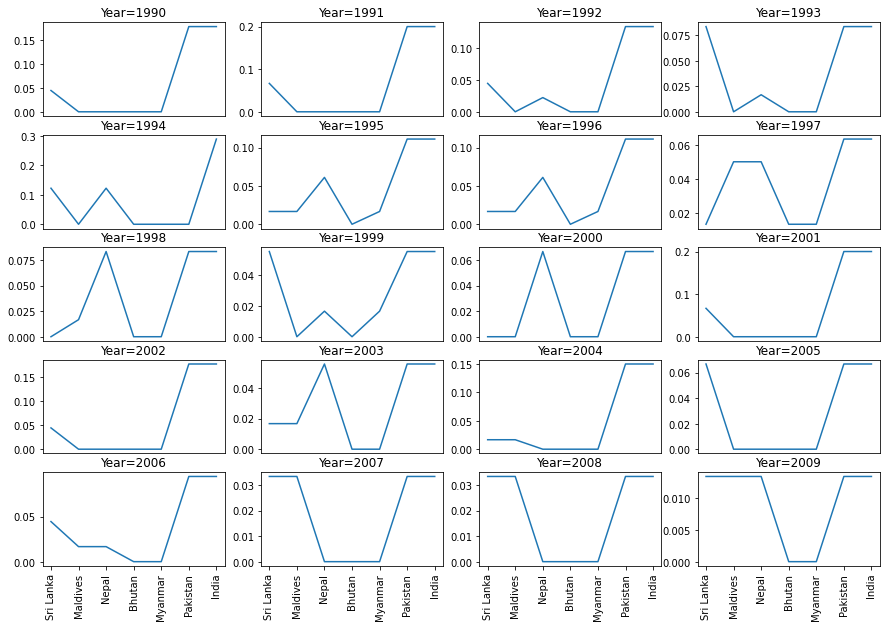

In [0]:
#d=nx.degree_centrality(Asean_subgraph[i])
from pylab import *
f = plt.figure(figsize=(15,10))
#fig3, ax = plt.subplots(5, 4,figsize=(28,15))

    #INPUT: examples_per_class: number of examples of each class you want to show
    # TODO: Your code here
    
    #gs1 = gridspec.GridSpec(4, 4)
    #gs1.update(wspace=0.0, hspace=0.0)
for i in range(20):
  f.add_subplot(5,4,i+1)
  d=nx.betweenness_centrality(Saarc_subgraph[i])
  plot(range(len(d)), list(d.values()))
  xticks([])
  if(i>=16): 
    xticks(range(len(d)), list(d.keys()),rotation=90)
  plot_title='Year='+str(1990+i)
  title(plot_title)
            #ax[j,k].show()  
            #axeslist[eg][keys].plot(range(len(d)), list(d.values()))
            #axeslist[eg][keys].xticks(range(len(d)), list(d.keys()),rotation=90)
            #i=i+1
        ##axeslist[0][keys].title.set_text(dict_classes[keys])
 
    # End of your code
    
#visualize_images()
#plt.plot(range(len(d)), list(d.values()))
#plt.xticks(range(len(d)), list(d.keys()),rotation=90)

show()

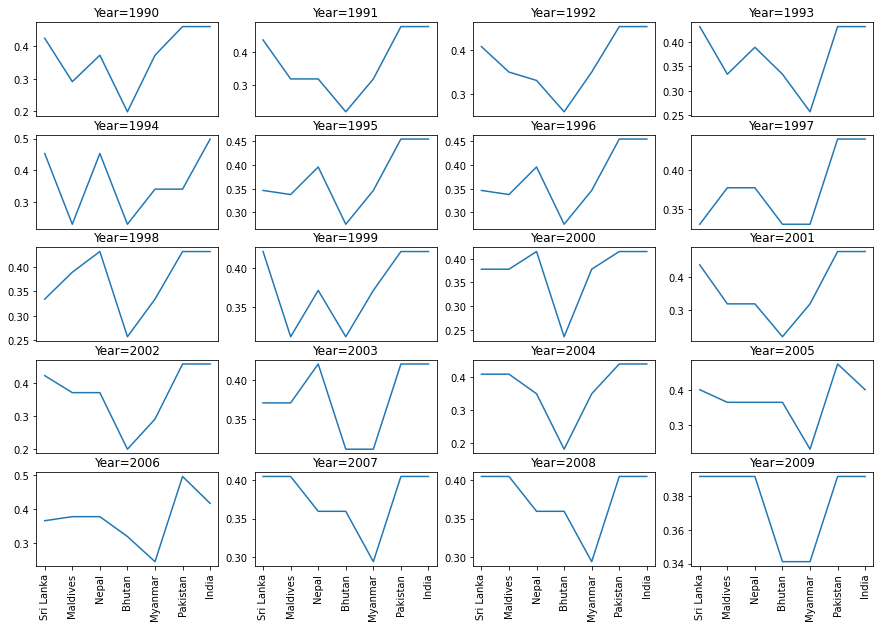

In [0]:
#d=nx.degree_centrality(Asean_subgraph[i])
from pylab import *
f = plt.figure(figsize=(15,10))
#fig3, ax = plt.subplots(5, 4,figsize=(28,15))

    #INPUT: examples_per_class: number of examples of each class you want to show
    # TODO: Your code here
    
    #gs1 = gridspec.GridSpec(4, 4)
    #gs1.update(wspace=0.0, hspace=0.0)
for i in range(20):
  f.add_subplot(5,4,i+1)
  d=nx.eigenvector_centrality(Saarc_subgraph[i])
  plot(range(len(d)), list(d.values()))
  xticks([])
  if(i>=16): 
    xticks(range(len(d)), list(d.keys()),rotation=90)
  plot_title='Year='+str(1990+i)
  title(plot_title)
            #ax[j,k].show()  
            #axeslist[eg][keys].plot(range(len(d)), list(d.values()))
            #axeslist[eg][keys].xticks(range(len(d)), list(d.keys()),rotation=90)
            #i=i+1
        ##axeslist[0][keys].title.set_text(dict_classes[keys])
 
    # End of your code
    
#visualize_images()
#plt.plot(range(len(d)), list(d.values()))
#plt.xticks(range(len(d)), list(d.keys()),rotation=90)

show()

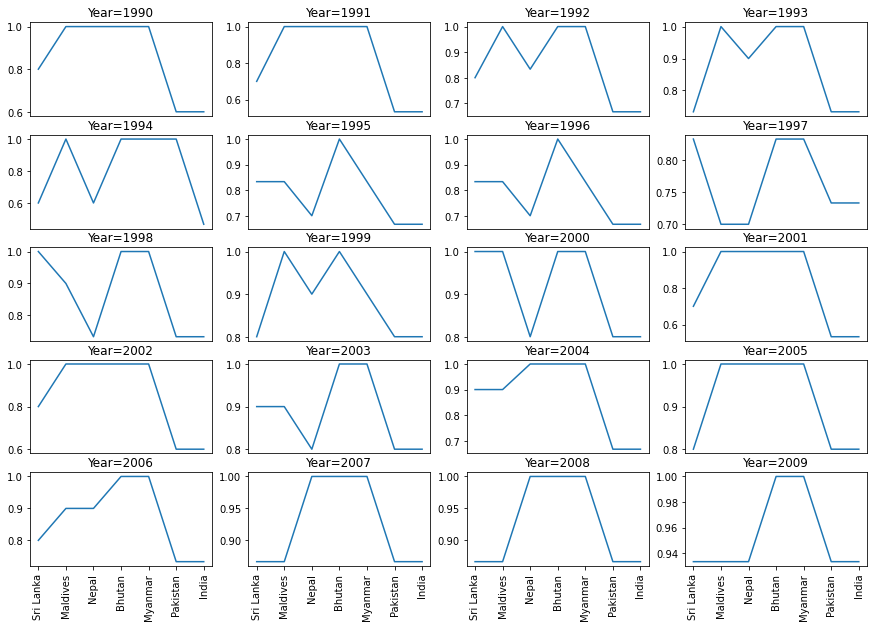

In [0]:
  #d=nx.degree_centrality(Asean_subgraph[i])
from pylab import *
f = plt.figure(figsize=(15,10))
#fig3, ax = plt.subplots(5, 4,figsize=(28,15))

    #INPUT: examples_per_class: number of examples of each class you want to show
    # TODO: Your code here
    
    #gs1 = gridspec.GridSpec(4, 4)
    #gs1.update(wspace=0.0, hspace=0.0)
for i in range(20):
  f.add_subplot(5,4,i+1)
  d=nx.clustering(Saarc_subgraph[i])
  plot(range(len(d)), list(d.values()))
  xticks([])
  if(i>=16): 
    xticks(range(len(d)), list(d.keys()),rotation=90)
  plot_title='Year='+str(1990+i)
  title(plot_title)
            #ax[j,k].show()  
            #axeslist[eg][keys].plot(range(len(d)), list(d.values()))
            #axeslist[eg][keys].xticks(range(len(d)), list(d.keys()),rotation=90)
            #i=i+1
        ##axeslist[0][keys].title.set_text(dict_classes[keys])
 
    # End of your code
    
#visualize_images()
#plt.plot(range(len(d)), list(d.values()))
#plt.xticks(range(len(d)), list(d.keys()),rotation=90)

show()

In [0]:
#G20 analysis

In [0]:
G20_list[1]

'Australia'

In [0]:
degree_deviation_G20 = []
degree_G20_yearwise = []
for j in range(0,20):
  degree_deviation_G20 = []
  for i in range(len(G20_list)):
    print(graph_list[j].degree[G20_list[i]],"  ",G20_list[i]," ", list_of_years[j])
    degree_deviation_G20.append(graph_list[j].degree[G20_list[i]])
  degree_G20_yearwise.append(degree_deviation_G20)
#degree_deviation_G20




132    Argentina   1990
158    Australia   1990
135    Brazil   1990
169    Canada   1990
159    China   1990
187    Germany   1990
182    France   1990
146    India   1990
140    Indonesia   1990
182    Italy   1990
185    Japan   1990
172    Mexico   1990
127    Saudi Arabia   1990
82    South Africa   1990
151    Turkey   1990
190    United States   1990
189    United Kingdom   1990
142    Argentina   1991
163    Australia   1991
135    Brazil   1991
163    Canada   1991
164    China   1991
185    Germany   1991
184    France   1991
139    India   1991
138    Indonesia   1991
184    Italy   1991
186    Japan   1991
162    Mexico   1991
123    Saudi Arabia   1991
89    South Africa   1991
133    Turkey   1991
189    United States   1991
187    United Kingdom   1991
132    Argentina   1992
172    Australia   1992
134    Brazil   1992
168    Canada   1992
178    China   1992
205    Germany   1992
199    France   1992
144    India   1992
141    Indonesia   1992
205    Italy   1992
204  

In [0]:
#List of degree of G20 countries from 1990-2010 
print('Countries in G20',G20_list)
print('List of year analyzed',list_of_years)
print('Degree distribution across years for each country',degree_G20_yearwise)

Countries in G20 ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'Germany', 'France', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Saudi Arabia', 'South Africa', 'Turkey', 'United States', 'United Kingdom']
List of year analyzed [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
Degree distribution across years for each country [[132, 158, 135, 169, 159, 187, 182, 146, 140, 182, 185, 172, 127, 82, 151, 190, 189], [142, 163, 135, 163, 164, 185, 184, 139, 138, 184, 186, 162, 123, 89, 133, 189, 187], [132, 172, 134, 168, 178, 205, 199, 144, 141, 205, 204, 154, 154, 172, 168, 209, 191], [124, 179, 150, 180, 189, 210, 201, 162, 143, 204, 207, 155, 157, 185, 166, 208, 204], [133, 177, 160, 196, 180, 207, 202, 167, 151, 204, 209, 178, 160, 181, 161, 206, 203], [157, 184, 172, 199, 184, 212, 204, 170, 162, 190, 208, 187, 170, 201, 171, 209, 207], [162, 185, 169, 199, 174, 208, 204, 168, 161, 202, 207, 178, 168,

In [0]:
G20_subgraph= []
for i in range(0,20):
  G20_subgraph.append('G20_'+str(1990+i))
G20_subgraph


['G20_1990',
 'G20_1991',
 'G20_1992',
 'G20_1993',
 'G20_1994',
 'G20_1995',
 'G20_1996',
 'G20_1997',
 'G20_1998',
 'G20_1999',
 'G20_2000',
 'G20_2001',
 'G20_2002',
 'G20_2003',
 'G20_2004',
 'G20_2005',
 'G20_2006',
 'G20_2007',
 'G20_2008',
 'G20_2009']

In [0]:
for i in range(0,20):
  G20_subgraph[i] = graph_list[i].subgraph(G20_list)

In [0]:
for i in range(0,20):
  print(sorted(nx.degree_centrality(G20_subgraph[i]).items(),key = lambda x:x[1],reverse = True))


#

[('Germany', 1.0), ('United States', 1.0), ('Argentina', 1.0), ('United Kingdom', 1.0), ('Mexico', 1.0), ('Brazil', 1.0), ('Italy', 1.0), ('Japan', 1.0), ('Turkey', 1.0), ('Australia', 1.0), ('China', 1.0), ('France', 1.0), ('Saudi Arabia', 1.0), ('Canada', 1.0), ('India', 1.0), ('Indonesia', 0.9375), ('South Africa', 0.9375)]
[('Germany', 1.0), ('United States', 1.0), ('Argentina', 1.0), ('United Kingdom', 1.0), ('Mexico', 1.0), ('Brazil', 1.0), ('Italy', 1.0), ('Japan', 1.0), ('Turkey', 1.0), ('Australia', 1.0), ('China', 1.0), ('France', 1.0), ('Saudi Arabia', 1.0), ('Canada', 1.0), ('India', 1.0), ('Indonesia', 0.9375), ('South Africa', 0.9375)]
[('Indonesia', 1.0), ('Germany', 1.0), ('United States', 1.0), ('Argentina', 1.0), ('United Kingdom', 1.0), ('Mexico', 1.0), ('South Africa', 1.0), ('Brazil', 1.0), ('Italy', 1.0), ('Japan', 1.0), ('Turkey', 1.0), ('Australia', 1.0), ('China', 1.0), ('France', 1.0), ('Saudi Arabia', 1.0), ('Canada', 1.0), ('India', 1.0)]
[('Indonesia', 1.0)

In [0]:
G20_list

['Argentina',
 'Australia',
 'Brazil',
 'Canada',
 'China',
 'Germany',
 'France',
 'India',
 'Indonesia',
 'Italy',
 'Japan',
 'Mexico',
 'Saudi Arabia',
 'South Africa',
 'Turkey',
 'United States',
 'United Kingdom']

In [0]:
G20_betweenness = []

for i in range(0,20):
  case_list = {}
  print(sorted(nx.betweenness_centrality(G20_subgraph[i]).items(),key = lambda x:x[1],reverse = True))
  #print(nx.betweenness_centrality(G20_subgraph[i]))
  G20_betweenness.append(nx.betweenness_centrality(G20_subgraph[i]))
  


[('Germany', 0.0005555555555555556), ('United States', 0.0005555555555555556), ('Argentina', 0.0005555555555555556), ('United Kingdom', 0.0005555555555555556), ('Mexico', 0.0005555555555555556), ('Brazil', 0.0005555555555555556), ('Italy', 0.0005555555555555556), ('Japan', 0.0005555555555555556), ('Turkey', 0.0005555555555555556), ('Australia', 0.0005555555555555556), ('China', 0.0005555555555555556), ('France', 0.0005555555555555556), ('Saudi Arabia', 0.0005555555555555556), ('Canada', 0.0005555555555555556), ('India', 0.0005555555555555556), ('Indonesia', 0.0), ('South Africa', 0.0)]
[('Germany', 0.0005555555555555556), ('United States', 0.0005555555555555556), ('Argentina', 0.0005555555555555556), ('United Kingdom', 0.0005555555555555556), ('Mexico', 0.0005555555555555556), ('Brazil', 0.0005555555555555556), ('Italy', 0.0005555555555555556), ('Japan', 0.0005555555555555556), ('Turkey', 0.0005555555555555556), ('Australia', 0.0005555555555555556), ('China', 0.0005555555555555556), ('

In [0]:
G20_betweenness

[{'Argentina': 0.0005555555555555556,
  'Australia': 0.0005555555555555556,
  'Brazil': 0.0005555555555555556,
  'Canada': 0.0005555555555555556,
  'China': 0.0005555555555555556,
  'France': 0.0005555555555555556,
  'Germany': 0.0005555555555555556,
  'India': 0.0005555555555555556,
  'Indonesia': 0.0,
  'Italy': 0.0005555555555555556,
  'Japan': 0.0005555555555555556,
  'Mexico': 0.0005555555555555556,
  'Saudi Arabia': 0.0005555555555555556,
  'South Africa': 0.0,
  'Turkey': 0.0005555555555555556,
  'United Kingdom': 0.0005555555555555556,
  'United States': 0.0005555555555555556},
 {'Argentina': 0.0005555555555555556,
  'Australia': 0.0005555555555555556,
  'Brazil': 0.0005555555555555556,
  'Canada': 0.0005555555555555556,
  'China': 0.0005555555555555556,
  'France': 0.0005555555555555556,
  'Germany': 0.0005555555555555556,
  'India': 0.0005555555555555556,
  'Indonesia': 0.0,
  'Italy': 0.0005555555555555556,
  'Japan': 0.0005555555555555556,
  'Mexico': 0.0005555555555555556,

In [0]:
#matrix
no_of_nodes = []
no_of_edges = []
dens = []
avg_degree = []
avg_shortest_path = []
avg_clustering_coefficient = []
clustering_coefficient = []
diameter_value = []
eigen_vector_value = []
for i in range(0,20):
  # print number of nodes
  print("Number of Nodes: for G20 trade"+str(1990+i), nx.number_of_nodes(G20_subgraph[i]))
  no_of_nodes.append(nx.number_of_nodes(G20_subgraph[i]))
  # print number of edges
  print("Number of Edges: for G20 trade "+str(1990+i), nx.number_of_edges(G20_subgraph[i]))
  no_of_edges.append(nx.number_of_edges(G20_subgraph[i]))
  # print density of network
  print("Density: for G20 trade "+str(1990+i), nx.density(G20_subgraph[i]))
  dens.append(nx.density(G20_subgraph[i]))
  # Average degree
  print("Average Degree: for G20 trade "+str(1990+i), 2*nx.number_of_edges(G20_subgraph[i]) / float(nx.number_of_nodes(G20_subgraph[i])))
  avg_degree.append(2*nx.number_of_edges(G20_subgraph[i]) / float(nx.number_of_nodes(G20_subgraph[i])))
  # print average shortest path length
  print("Average Shortest Path Length: for G20 trade "+str(1990+i), nx.average_shortest_path_length(G20_subgraph[i]))
  avg_shortest_path.append(nx.average_shortest_path_length(G20_subgraph[i]))
  # print average clustering coefficient
  print("Average Clustering Coefficient: for G20 trade "+str(1990+i), nx.average_clustering(G20_subgraph[i]))
  avg_clustering_coefficient.append(nx.average_clustering(G20_subgraph[i]))
  #print clustering coefficient
  print("Clustering Coefficient: for G20 trade "+str(1990+i), nx.clustering(G20_subgraph[i]))
  clustering_coefficient.append(nx.clustering(G20_subgraph[i]))
  #print diameter
  print("Diameter: for Saarc trade "+str(1990+i), nx.diameter(G20_subgraph[i]))
  diameter_value.append(nx.diameter(G20_subgraph[i]))
  print("Eigen vector : for Saarc trade nodes "+str(1990+i), nx.eigenvector_centrality(G20_subgraph[i]))
  eigen_vector_value.append(nx.eigenvector_centrality(G20_subgraph[i]))

Number of Nodes: for G20 trade1990 17
Number of Edges: for G20 trade 1990 135
Density: for G20 trade 1990 0.9926470588235294
Average Degree: for G20 trade 1990 15.882352941176471
Average Shortest Path Length: for G20 trade 1990 1.0073529411764706
Average Clustering Coefficient: for G20 trade 1990 0.9926470588235297
Clustering Coefficient: for G20 trade 1990 {'Indonesia': 1.0, 'Germany': 0.9916666666666667, 'United States': 0.9916666666666667, 'Argentina': 0.9916666666666667, 'United Kingdom': 0.9916666666666667, 'Mexico': 0.9916666666666667, 'South Africa': 1.0, 'Brazil': 0.9916666666666667, 'Italy': 0.9916666666666667, 'Japan': 0.9916666666666667, 'Turkey': 0.9916666666666667, 'Australia': 0.9916666666666667, 'China': 0.9916666666666667, 'France': 0.9916666666666667, 'Saudi Arabia': 0.9916666666666667, 'Canada': 0.9916666666666667, 'India': 0.9916666666666667}
Diameter: for Saarc trade 1990 2
Eigen vector : for Saarc trade nodes 1990 {'Indonesia': 0.2304553320651087, 'Germany': 0.2441

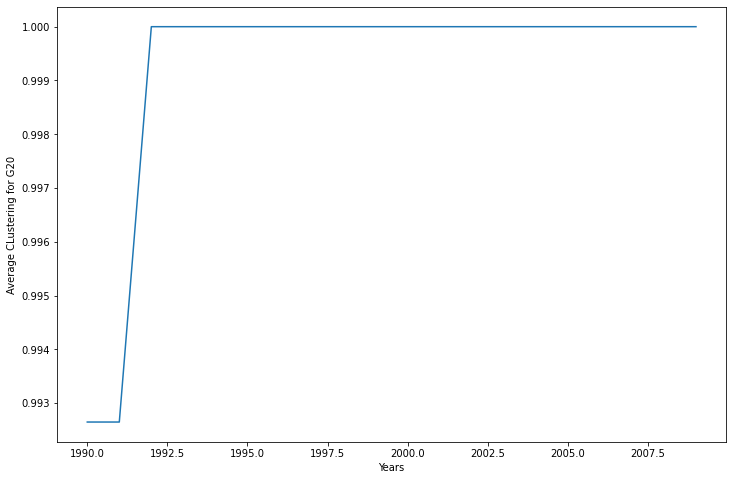

In [0]:

plt.plot(list_of_years,avg_clustering_coefficient)
plt.xlabel('Years')
plt.ylabel('Average CLustering for G20')
plt.show()


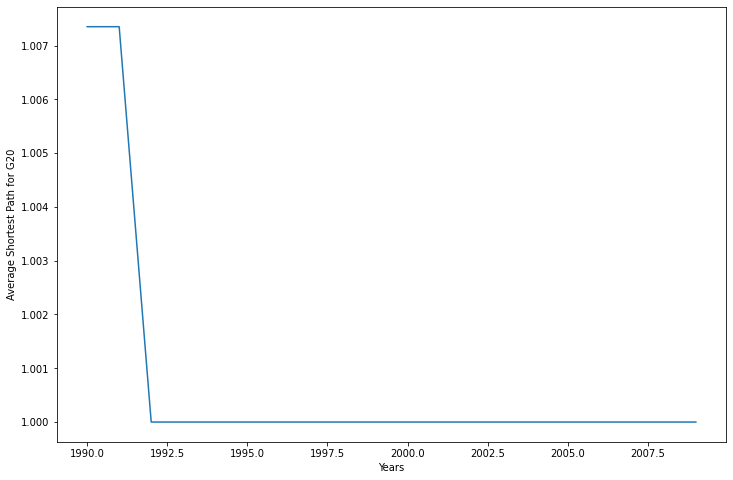

In [0]:
plt.plot( list_of_years,avg_shortest_path)
plt.xlabel('Years')
plt.ylabel('Average Shortest Path for G20')
plt.show()


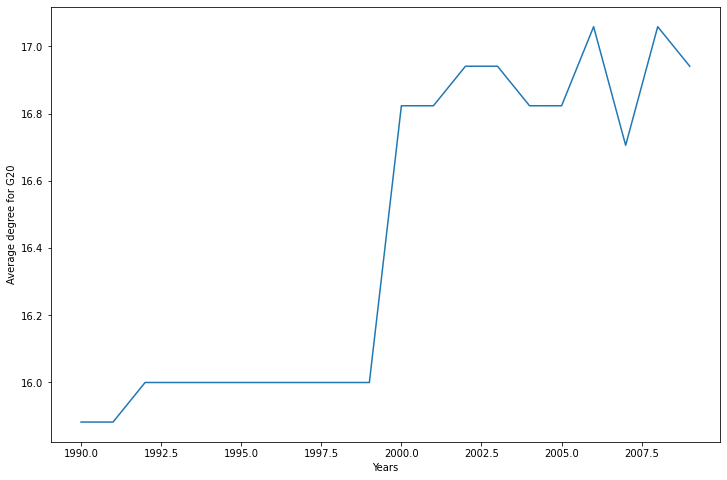

In [0]:

plt.plot( list_of_years,avg_degree)
plt.xlabel('Years')
plt.ylabel('Average degree for G20')
plt.show()

Completed Louvain algorithm .. . . 
                                                                                                                                                                                               Members
Community_Num                                                                                                                                                                                         
0              Indonesia | Germany | United States | Argentina | United Kingdom | Mexico | South Africa | Brazil | Italy | Japan | Turkey | Australia | China | France | Saudi Arabia | Canada | India
Modularity:  0.0
Total number of Communities= 1
Community_Num                                                                                                                                                                                        0
Members        Indonesia | Germany | United States | Argentina | United Kingdom | Mexico | South Africa | Brazil | Italy

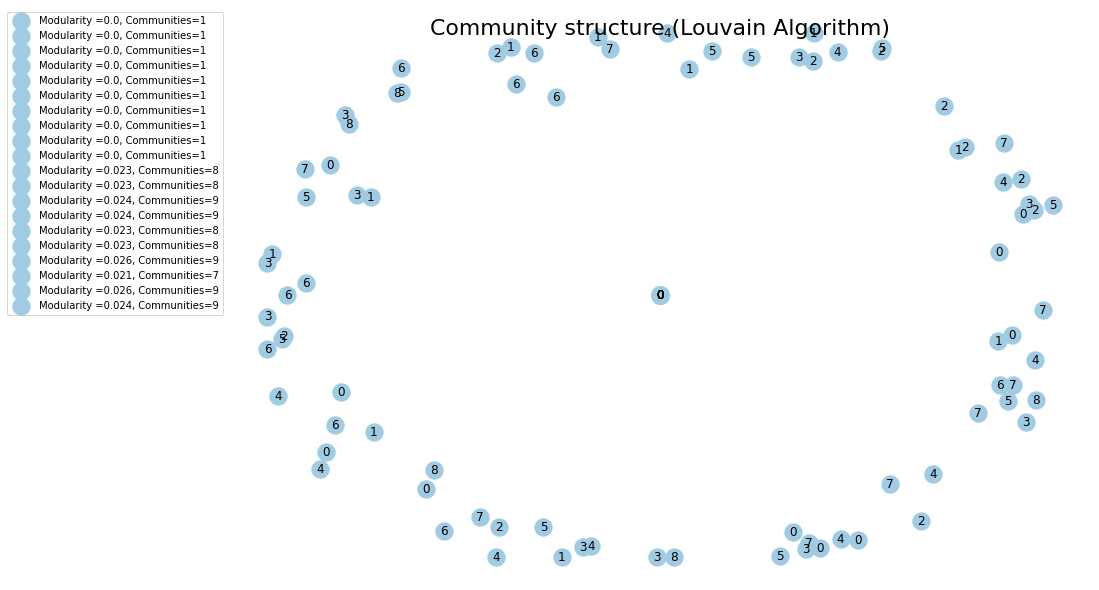

In [0]:
for i in range(0,20):
  Lovian_Community_Detection(G20_subgraph[i])
#Number of communities have risen from a consistent 1 throughout 1990-2000 to now 9 
#modularity increase indicate denser and stronger trade network

In [0]:

k=1
for i in range(1990,2010):
  comp = girvan_newman(G20_subgraph[i-1990])
  for communities in itertools.islice(comp, k):
    print('Community in year',i)
    print(tuple(sorted(c) for c in communities))

Community in year 1990
(['Indonesia'], ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Mexico', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States'])
Community in year 1991
(['Indonesia'], ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Mexico', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States'])
Community in year 1992
(['Indonesia'], ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Mexico', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States'])
Community in year 1993
(['Indonesia'], ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Mexico', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States'])
Community in year 1994
(['Indonesia'], ['Argentina', 'Australia', 'Brazil', 

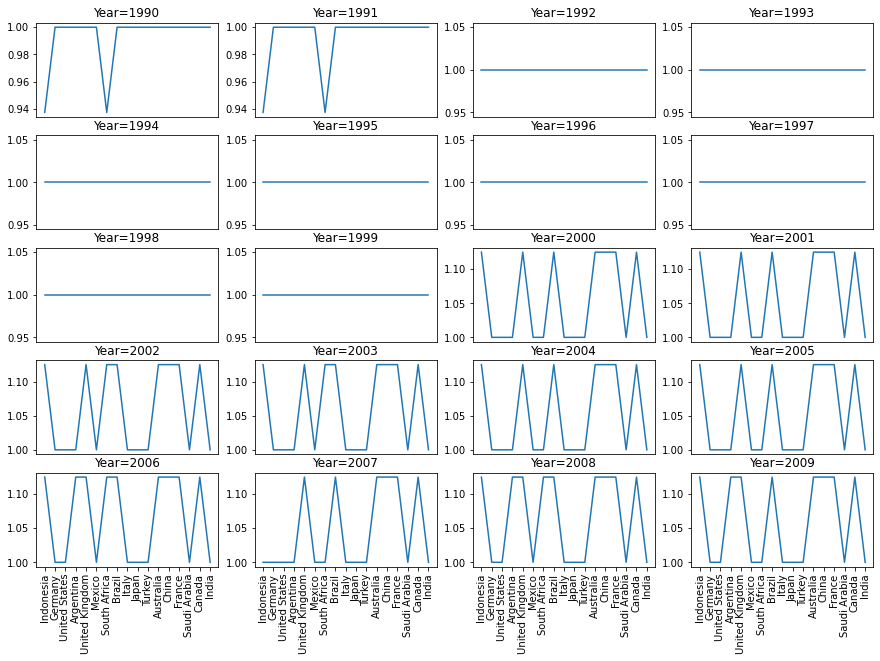

In [0]:
#d=nx.degree_centrality(Asean_subgraph[i])
from pylab import *
f = plt.figure(figsize=(15,10))
#fig3, ax = plt.subplots(5, 4,figsize=(28,15))

    #INPUT: examples_per_class: number of examples of each class you want to show
    # TODO: Your code here
    
    #gs1 = gridspec.GridSpec(4, 4)
    #gs1.update(wspace=0.0, hspace=0.0)
for i in range(20):
  f.add_subplot(5,4,i+1)
  d=nx.degree_centrality(G20_subgraph[i])
  plot(range(len(d)), list(d.values()))
  xticks([])
  if(i>=16): 
    xticks(range(len(d)), list(d.keys()),rotation=90)
  plot_title='Year='+str(1990+i)
  title(plot_title)
            #ax[j,k].show()  
            #axeslist[eg][keys].plot(range(len(d)), list(d.values()))
            #axeslist[eg][keys].xticks(range(len(d)), list(d.keys()),rotation=90)
            #i=i+1
        ##axeslist[0][keys].title.set_text(dict_classes[keys])
 
    # End of your code
    
#visualize_images()
#plt.plot(range(len(d)), list(d.values()))
#plt.xticks(range(len(d)), list(d.keys()),rotation=90)

show()

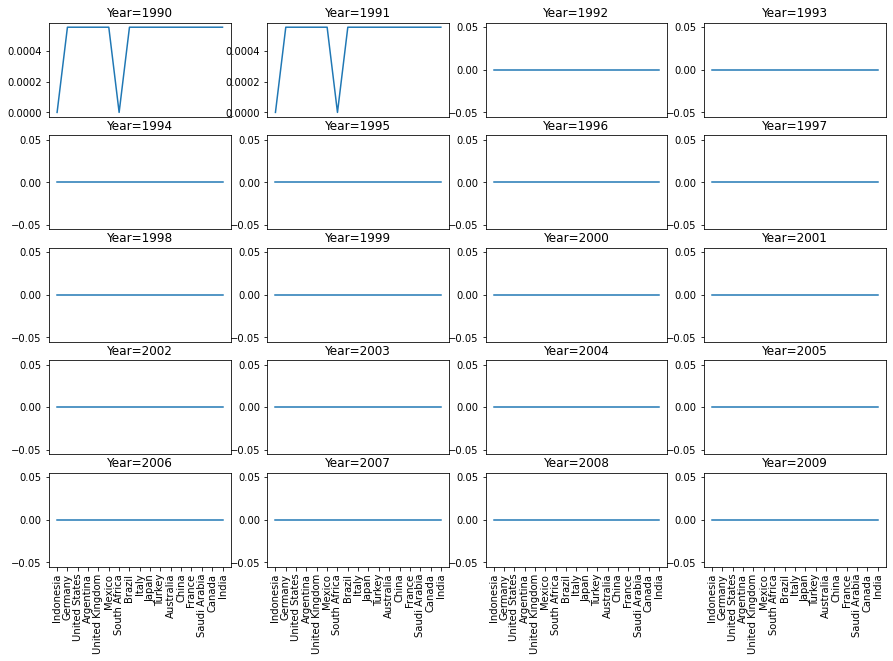

In [0]:
#d=nx.degree_centrality(Asean_subgraph[i])
from pylab import *
f = plt.figure(figsize=(15,10))
#fig3, ax = plt.subplots(5, 4,figsize=(28,15))

    #INPUT: examples_per_class: number of examples of each class you want to show
    # TODO: Your code here
    
    #gs1 = gridspec.GridSpec(4, 4)
    #gs1.update(wspace=0.0, hspace=0.0)
for i in range(20):
  f.add_subplot(5,4,i+1)
  d=nx.betweenness_centrality(G20_subgraph[i])
  plot(range(len(d)), list(d.values()))
  xticks([])
  if(i>=16): 
    xticks(range(len(d)), list(d.keys()),rotation=90)
  plot_title='Year='+str(1990+i)
  title(plot_title)
            #ax[j,k].show()  
            #axeslist[eg][keys].plot(range(len(d)), list(d.values()))
            #axeslist[eg][keys].xticks(range(len(d)), list(d.keys()),rotation=90)
            #i=i+1
        ##axeslist[0][keys].title.set_text(dict_classes[keys])
 
    # End of your code
    
#visualize_images()
#plt.plot(range(len(d)), list(d.values()))
#plt.xticks(range(len(d)), list(d.keys()),rotation=90)

show()

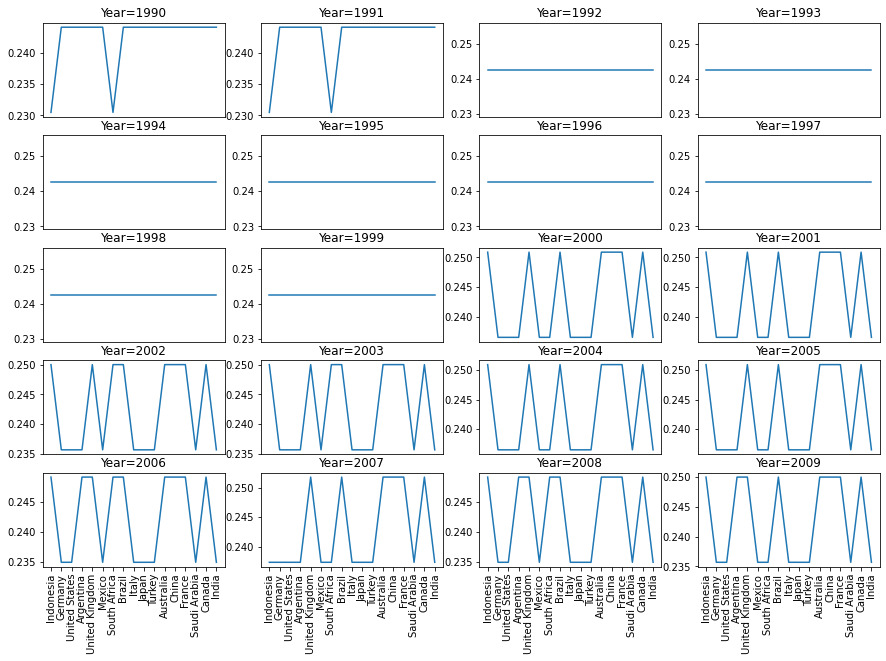

In [0]:
#d=nx.degree_centrality(Asean_subgraph[i])
from pylab import *
f = plt.figure(figsize=(15,10))
#fig3, ax = plt.subplots(5, 4,figsize=(28,15))

    #INPUT: examples_per_class: number of examples of each class you want to show
    # TODO: Your code here
    
    #gs1 = gridspec.GridSpec(4, 4)
    #gs1.update(wspace=0.0, hspace=0.0)
for i in range(20):
  f.add_subplot(5,4,i+1)
  d=nx.eigenvector_centrality(G20_subgraph[i])
  plot(range(len(d)), list(d.values()))
  xticks([])
  if(i>=16): 
    xticks(range(len(d)), list(d.keys()),rotation=90)
  plot_title='Year='+str(1990+i)
  title(plot_title)
            #ax[j,k].show()  
            #axeslist[eg][keys].plot(range(len(d)), list(d.values()))
            #axeslist[eg][keys].xticks(range(len(d)), list(d.keys()),rotation=90)
            #i=i+1
        ##axeslist[0][keys].title.set_text(dict_classes[keys])
 
    # End of your code
    
#visualize_images()
#plt.plot(range(len(d)), list(d.values()))
#plt.xticks(range(len(d)), list(d.keys()),rotation=90)

show()

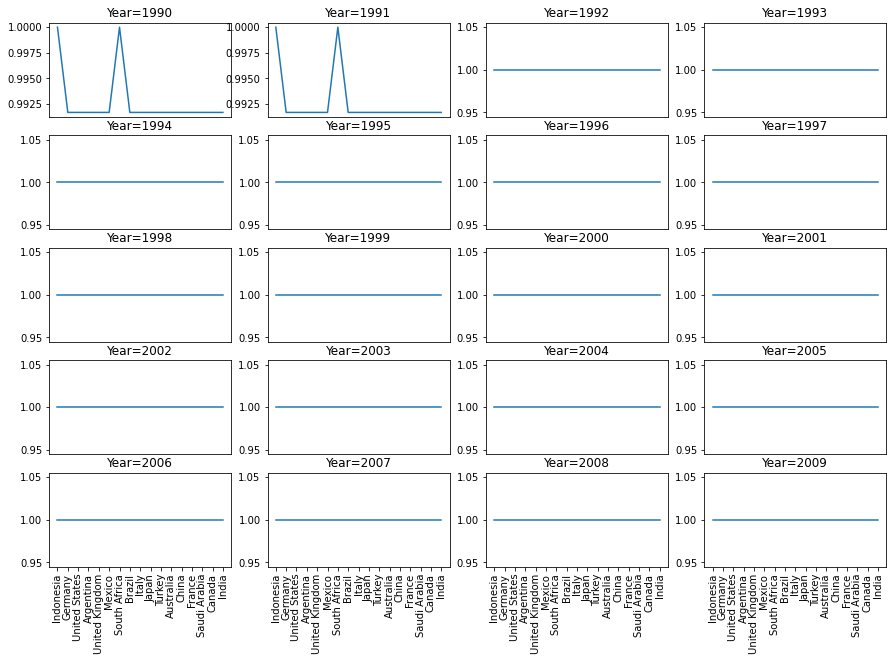

In [0]:
  #d=nx.degree_centrality(Asean_subgraph[i])
from pylab import *
f = plt.figure(figsize=(15,10))
#fig3, ax = plt.subplots(5, 4,figsize=(28,15))

    #INPUT: examples_per_class: number of examples of each class you want to show
    # TODO: Your code here
    
    #gs1 = gridspec.GridSpec(4, 4)
    #gs1.update(wspace=0.0, hspace=0.0)
for i in range(20):
  f.add_subplot(5,4,i+1)
  d=nx.clustering(G20_subgraph[i])
  plot(range(len(d)), list(d.values()))
  xticks([])
  if(i>=16): 
    xticks(range(len(d)), list(d.keys()),rotation=90)
  plot_title='Year='+str(1990+i)
  title(plot_title)
            #ax[j,k].show()  
            #axeslist[eg][keys].plot(range(len(d)), list(d.values()))
            #axeslist[eg][keys].xticks(range(len(d)), list(d.keys()),rotation=90)
            #i=i+1
        ##axeslist[0][keys].title.set_text(dict_classes[keys])
 
    # End of your code
    
#visualize_images()
#plt.plot(range(len(d)), list(d.values()))
#plt.xticks(range(len(d)), list(d.keys()),rotation=90)

show()

In [0]:
#MERCUSOR -> SOUTH AMERICAN TRADE BLOC

In [0]:
Mercusor_list[1]

'Brazil'

In [0]:
degree_deviation_mercusor = []
degree_mercusor_yearwise = []
for j in range(0,20):
  degree_deviation_mercusor = []
  for i in range(len(Mercusor_list)):
    print(graph_list[j].degree[Mercusor_list[i]],"  ",Mercusor_list[i]," ", list_of_years[j])
    degree_deviation_mercusor.append(graph_list[j].degree[Mercusor_list[i]])
  degree_mercusor_yearwise.append(degree_deviation_mercusor)
#degree_deviation_asean

132    Argentina   1990
135    Brazil   1990
78    Paraguay   1990
107    Uruguay   1990
105    Bolivia   1990
132    Chile   1990
132    Colombia   1990
105    Ecuador   1990
48    Guyana   1990
121    Peru   1990
68    Suriname   1990
142    Argentina   1991
135    Brazil   1991
75    Paraguay   1991
107    Uruguay   1991
119    Bolivia   1991
138    Chile   1991
129    Colombia   1991
109    Ecuador   1991
92    Guyana   1991
126    Peru   1991
69    Suriname   1991
132    Argentina   1992
134    Brazil   1992
83    Paraguay   1992
108    Uruguay   1992
114    Bolivia   1992
137    Chile   1992
153    Colombia   1992
107    Ecuador   1992
107    Guyana   1992
131    Peru   1992
69    Suriname   1992
124    Argentina   1993
150    Brazil   1993
83    Paraguay   1993
116    Uruguay   1993
129    Bolivia   1993
136    Chile   1993
178    Colombia   1993
109    Ecuador   1993
63    Guyana   1993
135    Peru   1993
50    Suriname   1993
133    Argentina   1994
160    Brazil   1994
81    

In [0]:
#List of degree of ASEAN countries from 1990-2010 
print('Countries in Mercusor',Mercusor_list)
print('List of year analyzed',list_of_years)
print('Degree distribution across years for each country',degree_mercusor_yearwise)

Countries in Mercusor ['Argentina', 'Brazil', 'Paraguay', 'Uruguay', 'Bolivia', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Peru', 'Suriname']
List of year analyzed [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
Degree distribution across years for each country [[132, 135, 78, 107, 105, 132, 132, 105, 48, 121, 68], [142, 135, 75, 107, 119, 138, 129, 109, 92, 126, 69], [132, 134, 83, 108, 114, 137, 153, 107, 107, 131, 69], [124, 150, 83, 116, 129, 136, 178, 109, 63, 135, 50], [133, 160, 81, 126, 108, 141, 174, 120, 64, 144, 73], [157, 172, 88, 122, 126, 151, 180, 134, 67, 148, 88], [162, 169, 97, 134, 114, 153, 175, 133, 71, 146, 93], [167, 187, 97, 126, 121, 155, 179, 143, 108, 137, 100], [160, 179, 96, 139, 132, 148, 179, 163, 111, 143, 96], [158, 183, 94, 145, 130, 148, 176, 150, 113, 147, 103], [175, 206, 112, 155, 131, 167, 199, 172, 137, 176, 112], [176, 207, 106, 150, 127, 163, 196, 173, 137, 189, 125], [173

In [0]:
Mercusor_subgraph= []
for i in range(0,20):
  Mercusor_subgraph.append('Mercusor_'+str(1990+i))
Mercusor_subgraph


['Mercusor_1990',
 'Mercusor_1991',
 'Mercusor_1992',
 'Mercusor_1993',
 'Mercusor_1994',
 'Mercusor_1995',
 'Mercusor_1996',
 'Mercusor_1997',
 'Mercusor_1998',
 'Mercusor_1999',
 'Mercusor_2000',
 'Mercusor_2001',
 'Mercusor_2002',
 'Mercusor_2003',
 'Mercusor_2004',
 'Mercusor_2005',
 'Mercusor_2006',
 'Mercusor_2007',
 'Mercusor_2008',
 'Mercusor_2009']

In [0]:
for i in range(0,20):
  Mercusor_subgraph[i] = graph_list[i].subgraph(Mercusor_list)

In [0]:
for i in range(0,20):
  print(1990+i )
  print(sorted(nx.degree_centrality(Mercusor_subgraph[i]).items(),key = lambda x:x[1],reverse = True))


#Members and their joining date

# Argentina (1991),Brazil (1991),Paraguay (1991),Uruguay (1991),Bolivia (1996),Chile (1996),Colombia (2004),Ecuador (2004),Guyana (2013),Peru (2003),Suriname (2013)



1990
[('Ecuador', 1.0), ('Brazil', 1.0), ('Colombia', 1.0), ('Chile', 0.9), ('Argentina', 0.9), ('Peru', 0.9), ('Uruguay', 0.8), ('Paraguay', 0.8), ('Bolivia', 0.8), ('Guyana', 0.6000000000000001), ('Suriname', 0.5)]
1991
[('Chile', 1.0), ('Argentina', 1.0), ('Uruguay', 1.0), ('Suriname', 1.0), ('Peru', 1.0), ('Brazil', 1.0), ('Colombia', 1.0), ('Paraguay', 1.0), ('Bolivia', 1.0), ('Guyana', 0.9), ('Ecuador', 0.9)]
1992
[('Guyana', 1.0), ('Argentina', 1.0), ('Peru', 1.0), ('Brazil', 1.0), ('Colombia', 1.0), ('Chile', 0.9), ('Ecuador', 0.9), ('Uruguay', 0.9), ('Paraguay', 0.9), ('Bolivia', 0.9), ('Suriname', 0.5)]
1993
[('Brazil', 1.0), ('Colombia', 1.0), ('Chile', 0.9), ('Ecuador', 0.9), ('Peru', 0.9), ('Argentina', 0.8), ('Uruguay', 0.8), ('Paraguay', 0.8), ('Bolivia', 0.8), ('Guyana', 0.5), ('Suriname', 0.2)]
1994
[('Brazil', 1.0), ('Colombia', 1.0), ('Chile', 0.9), ('Argentina', 0.9), ('Uruguay', 0.9), ('Peru', 0.9), ('Bolivia', 0.9), ('Ecuador', 0.8), ('Paraguay', 0.8), ('Suriname'

In [0]:
Mercusor_betweenness = []

for i in range(0,20):
  case_list = {}
  print(1990+i)
  print(sorted(nx.betweenness_centrality(Mercusor_subgraph[i]).items(),key = lambda x:x[1],reverse = True))
  #print(nx.betweenness_centrality(Mercusor_subgraph[i]))
  Mercusor_betweenness.append(nx.betweenness_centrality(Mercusor_subgraph[i]))
  




1990
[('Ecuador', 0.0425925925925926), ('Brazil', 0.0425925925925926), ('Colombia', 0.0425925925925926), ('Argentina', 0.025555555555555554), ('Chile', 0.017037037037037038), ('Peru', 0.017037037037037038), ('Guyana', 0.008888888888888889), ('Suriname', 0.003703703703703704), ('Uruguay', 0.0), ('Paraguay', 0.0), ('Bolivia', 0.0)]
1991
[('Chile', 0.0024691358024691358), ('Argentina', 0.0024691358024691358), ('Uruguay', 0.0024691358024691358), ('Suriname', 0.0024691358024691358), ('Peru', 0.0024691358024691358), ('Brazil', 0.0024691358024691358), ('Colombia', 0.0024691358024691358), ('Paraguay', 0.0024691358024691358), ('Bolivia', 0.0024691358024691358), ('Guyana', 0.0), ('Ecuador', 0.0)]
1992
[('Guyana', 0.022222222222222223), ('Argentina', 0.022222222222222223), ('Peru', 0.022222222222222223), ('Brazil', 0.022222222222222223), ('Colombia', 0.022222222222222223), ('Chile', 0.0), ('Ecuador', 0.0), ('Uruguay', 0.0), ('Suriname', 0.0), ('Paraguay', 0.0), ('Bolivia', 0.0)]
1993
[('Brazil', 

In [0]:
Mercusor_betweenness

[{'Argentina': 0.025555555555555554,
  'Bolivia': 0.0,
  'Brazil': 0.0425925925925926,
  'Chile': 0.017037037037037038,
  'Colombia': 0.0425925925925926,
  'Ecuador': 0.0425925925925926,
  'Guyana': 0.008888888888888889,
  'Paraguay': 0.0,
  'Peru': 0.017037037037037038,
  'Suriname': 0.003703703703703704,
  'Uruguay': 0.0},
 {'Argentina': 0.0024691358024691358,
  'Bolivia': 0.0024691358024691358,
  'Brazil': 0.0024691358024691358,
  'Chile': 0.0024691358024691358,
  'Colombia': 0.0024691358024691358,
  'Ecuador': 0.0,
  'Guyana': 0.0,
  'Paraguay': 0.0024691358024691358,
  'Peru': 0.0024691358024691358,
  'Suriname': 0.0024691358024691358,
  'Uruguay': 0.0024691358024691358},
 {'Argentina': 0.022222222222222223,
  'Bolivia': 0.0,
  'Brazil': 0.022222222222222223,
  'Chile': 0.0,
  'Colombia': 0.022222222222222223,
  'Ecuador': 0.0,
  'Guyana': 0.022222222222222223,
  'Paraguay': 0.0,
  'Peru': 0.022222222222222223,
  'Suriname': 0.0,
  'Uruguay': 0.0},
 {'Argentina': 0.0,
  'Bolivia':

In [0]:
#matrix
no_of_nodes = []
no_of_edges = []
dens = []
avg_degree = []
avg_shortest_path = []
avg_clustering_coefficient = []
clustering_coefficient = []
diameter_value = []
eigen_vector_value = []
for i in range(0,20):
  # print number of nodes
  print("Number of Nodes: for Mercusor trade"+str(1990+i), nx.number_of_nodes(Mercusor_subgraph[i]))
  no_of_nodes.append(nx.number_of_nodes(Mercusor_subgraph[i]))
  # print number of edges
  print("Number of Edges: for Mercusor trade "+str(1990+i), nx.number_of_edges(Mercusor_subgraph[i]))
  no_of_edges.append(nx.number_of_edges(Mercusor_subgraph[i]))
  # print density of network
  print("Density: for Mercusor trade "+str(1990+i), nx.density(Mercusor_subgraph[i]))
  dens.append(nx.density(Mercusor_subgraph[i]))
  # Average degree
  print("Average Degree: for Mercusor trade "+str(1990+i), 2*nx.number_of_edges(Mercusor_subgraph[i]) / float(nx.number_of_nodes(Mercusor_subgraph[i])))
  avg_degree.append(2*nx.number_of_edges(Mercusor_subgraph[i]) / float(nx.number_of_nodes(Mercusor_subgraph[i])))
  # print average shortest path length
  print("Average Shortest Path Length: for Mercusor trade "+str(1990+i), nx.average_shortest_path_length(Mercusor_subgraph[i]))
  avg_shortest_path.append(nx.average_shortest_path_length(Mercusor_subgraph[i]))
  # print average clustering coefficient
  print("Average Clustering Coefficient: for Mercusor trade "+str(1990+i), nx.average_clustering(Mercusor_subgraph[i]))
  avg_clustering_coefficient.append(nx.average_clustering(Mercusor_subgraph[i]))
  #print clustering coefficient
  print("Clustering Coefficient: for Mercusor trade "+str(1990+i), nx.clustering(Mercusor_subgraph[i]))
  clustering_coefficient.append(nx.clustering(Mercusor_subgraph[i]))
  #print diameter
  print("Diameter: for Mercusor trade "+str(1990+i), nx.diameter(Mercusor_subgraph[i]))
  diameter_value.append(nx.diameter(Saarc_subgraph[i]))
  print("Eigen vector : for Mercusor trade nodes "+str(1990+i), nx.eigenvector_centrality(Mercusor_subgraph[i]))
  eigen_vector_value.append(nx.eigenvector_centrality(Mercusor_subgraph[i]))

Number of Nodes: for Mercusor trade1990 11
Number of Edges: for Mercusor trade 1990 46
Density: for Mercusor trade 1990 0.8363636363636363
Average Degree: for Mercusor trade 1990 8.363636363636363
Average Shortest Path Length: for Mercusor trade 1990 1.1636363636363636
Average Clustering Coefficient: for Mercusor trade 1990 0.8914141414141414
Clustering Coefficient: for Mercusor trade 1990 {'Chile': 0.8888888888888888, 'Guyana': 0.8666666666666667, 'Argentina': 0.8611111111111112, 'Ecuador': 0.8, 'Uruguay': 1.0, 'Suriname': 0.9, 'Peru': 0.8888888888888888, 'Brazil': 0.8, 'Colombia': 0.8, 'Paraguay': 1.0, 'Bolivia': 1.0}
Diameter: for Mercusor trade 1990 2
Eigen vector : for Mercusor trade nodes 1990 {'Chile': 0.32118952062055944, 'Guyana': 0.2136454158084546, 'Argentina': 0.3176820615540376, 'Ecuador': 0.3398871857567775, 'Uruguay': 0.2989843964178196, 'Suriname': 0.17989836777722434, 'Peru': 0.32118952062055944, 'Brazil': 0.3398871857567775, 'Colombia': 0.3398871857567775, 'Paraguay':

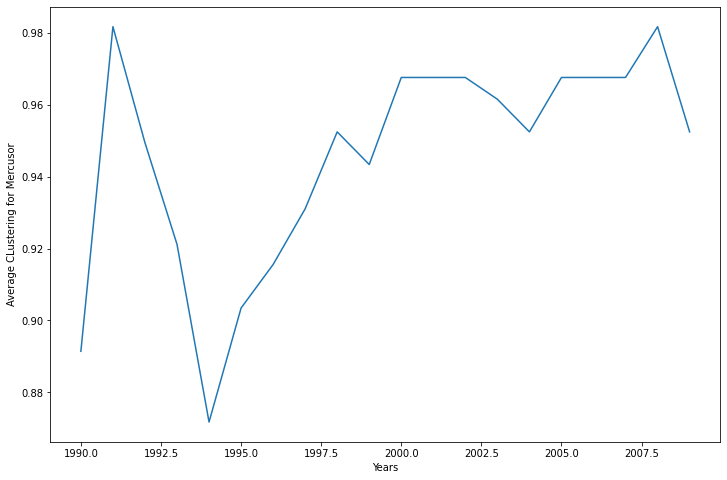

In [0]:

plt.plot(list_of_years,avg_clustering_coefficient)
plt.xlabel('Years')
plt.ylabel('Average CLustering for Mercusor')
plt.show()


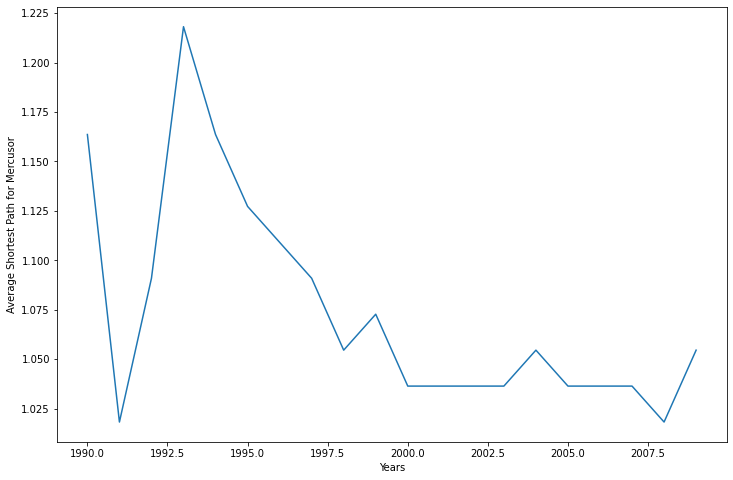

In [0]:
plt.plot( list_of_years,avg_shortest_path)
plt.xlabel('Years')
plt.ylabel('Average Shortest Path for Mercusor')
plt.show()


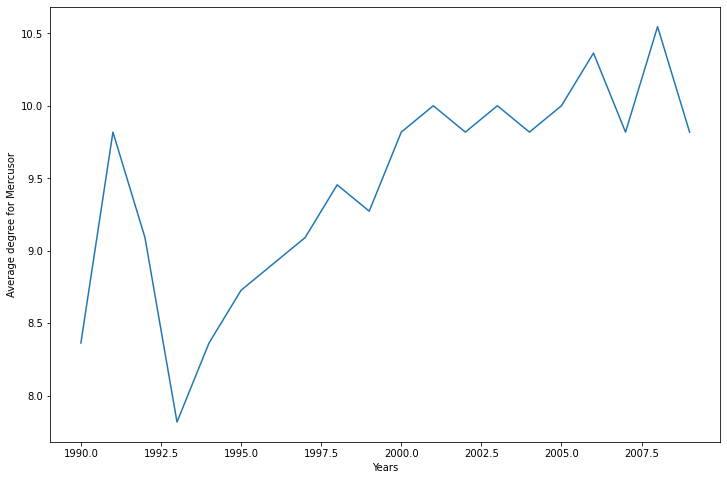

In [0]:

plt.plot( list_of_years,avg_degree)
plt.xlabel('Years')
plt.ylabel('Average degree for Mercusor')
plt.show()

Completed Louvain algorithm .. . . 
                                                               Members
Community_Num                                                         
0              Chile | Argentina | Uruguay | Peru | Paraguay | Bolivia
1                      Guyana | Ecuador | Suriname | Brazil | Colombia
Modularity:  0.03757088846880907
Total number of Communities= 2
Community_Num                                                        0                                                1
Members        Chile | Argentina | Uruguay | Peru | Paraguay | Bolivia  Guyana | Ecuador | Suriname | Brazil | Colombia
Completed Louvain algorithm .. . . 
                                                                                                                 Members
Community_Num                                                                                                           
0              Chile | Guyana | Argentina | Ecuador | Uruguay | Suriname | Peru | Brazil | Colombi

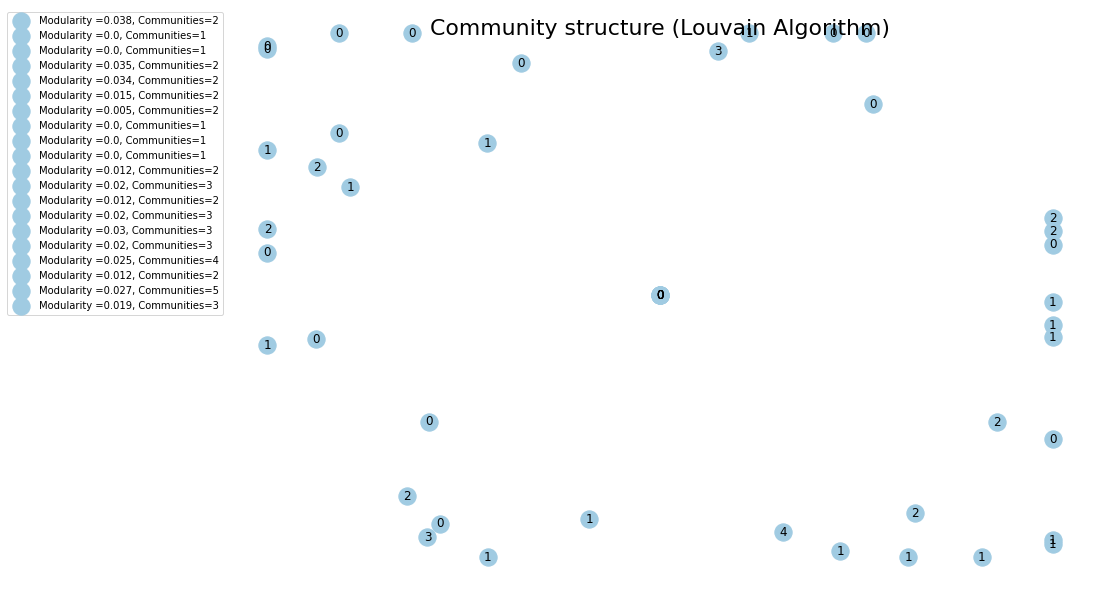

In [0]:
for i in range(0,20):
  Lovian_Community_Detection(Mercusor_subgraph[i])
#Number of communities have risen from a consistent 1 throughout 1990-2000 to now 5
#modularity fluctuation indicate lower economic partnership over the years 1990-2010

In [0]:
k=1
for i in range(1990,2010):
  comp = girvan_newman(Mercusor_subgraph[i-1990])
  for communities in itertools.islice(comp, k):
    print('Community in year',i)
    print(tuple(sorted(c) for c in communities))

Community in year 1990
(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Uruguay'], ['Suriname'])
Community in year 1991
(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay'], ['Ecuador'])
Community in year 1992
(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Uruguay'], ['Suriname'])
Community in year 1993
(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Uruguay'], ['Suriname'])
Community in year 1994
(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Suriname', 'Uruguay'], ['Guyana'])
Community in year 1995
(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Suriname', 'Uruguay'], ['Guyana'])
Community in year 1996
(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Surina

In [0]:
# Returns shortest path length between each node
#The “All Pairs Shortest Path” (APSP) algorithm finds the shortest path between all pairs of nodes.
#Although providing similar results, it is quicker than calling the Single Source Shortest Path for every pair of nodes. 
#This algorithm can typically be used to determine traffic load expected on different segments of a transportation grid.
list(nx.all_pairs_shortest_path_length(Mercusor_subgraph[0]))

[('Chile',
  {'Argentina': 1,
   'Bolivia': 1,
   'Brazil': 1,
   'Chile': 0,
   'Colombia': 1,
   'Ecuador': 1,
   'Guyana': 1,
   'Paraguay': 1,
   'Peru': 1,
   'Suriname': 2,
   'Uruguay': 1}),
 ('Guyana',
  {'Argentina': 2,
   'Bolivia': 2,
   'Brazil': 1,
   'Chile': 1,
   'Colombia': 1,
   'Ecuador': 1,
   'Guyana': 0,
   'Paraguay': 2,
   'Peru': 1,
   'Suriname': 1,
   'Uruguay': 2}),
 ('Argentina',
  {'Argentina': 0,
   'Bolivia': 1,
   'Brazil': 1,
   'Chile': 1,
   'Colombia': 1,
   'Ecuador': 1,
   'Guyana': 2,
   'Paraguay': 1,
   'Peru': 1,
   'Suriname': 1,
   'Uruguay': 1}),
 ('Ecuador',
  {'Argentina': 1,
   'Bolivia': 1,
   'Brazil': 1,
   'Chile': 1,
   'Colombia': 1,
   'Ecuador': 0,
   'Guyana': 1,
   'Paraguay': 1,
   'Peru': 1,
   'Suriname': 1,
   'Uruguay': 1}),
 ('Uruguay',
  {'Argentina': 1,
   'Bolivia': 1,
   'Brazil': 1,
   'Chile': 1,
   'Colombia': 1,
   'Ecuador': 1,
   'Guyana': 2,
   'Paraguay': 1,
   'Peru': 1,
   'Suriname': 2,
   'Uruguay': 0}),
 

In [0]:
#NAFTA -> NORTH AMERICAN TRADE BLOC
#The North American Free Trade Agreement (NAFTA) is a treaty entered into by the United States, Canada, and Mexico; it went into effect on January 1, 1994.
# (Free trade had existed between the U.S. and Canada since 1989; NAFTA broadened that arrangement.)(WIKIPEDIA)

In [0]:
Nafta_list[1]

'Canada'

In [0]:
degree_deviation_nafta = []
degree_nafta_yearwise = []
for j in range(0,20):
  degree_deviation_nafta = []
  for i in range(len(Nafta_list)):
    print(graph_list[j].degree[Nafta_list[i]],"  ",Nafta_list[i]," ", list_of_years[j])
    degree_deviation_nafta.append(graph_list[j].degree[Nafta_list[i]])
  degree_nafta_yearwise.append(degree_deviation_nafta)
#degree_deviation_nafta

190    United States   1990
169    Canada   1990
172    Mexico   1990
189    United States   1991
163    Canada   1991
162    Mexico   1991
209    United States   1992
168    Canada   1992
154    Mexico   1992
208    United States   1993
180    Canada   1993
155    Mexico   1993
206    United States   1994
196    Canada   1994
178    Mexico   1994
209    United States   1995
199    Canada   1995
187    Mexico   1995
206    United States   1996
199    Canada   1996
178    Mexico   1996
207    United States   1997
205    Canada   1997
182    Mexico   1997
209    United States   1998
204    Canada   1998
189    Mexico   1998
210    United States   1999
205    Canada   1999
192    Mexico   1999
220    United States   2000
220    Canada   2000
201    Mexico   2000
220    United States   2001
222    Canada   2001
203    Mexico   2001
220    United States   2002
223    Canada   2002
200    Mexico   2002
222    United States   2003
222    Canada   2003
199    Mexico   2003
221    United States

In [0]:
#List of degree of ASEAN countries from 1990-2010 
print('Countries in Nafta',Nafta_list)
print('List of year analyzed',list_of_years)
print('Degree distribution across years for each country',degree_nafta_yearwise)

Countries in Nafta ['United States', 'Canada', 'Mexico']
List of year analyzed [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
Degree distribution across years for each country [[190, 169, 172], [189, 163, 162], [209, 168, 154], [208, 180, 155], [206, 196, 178], [209, 199, 187], [206, 199, 178], [207, 205, 182], [209, 204, 189], [210, 205, 192], [220, 220, 201], [220, 222, 203], [220, 223, 200], [222, 222, 199], [221, 222, 211], [221, 224, 224], [220, 223, 226], [221, 225, 227], [221, 225, 227], [220, 225, 227]]


In [0]:
Nafta_subgraph= []
for i in range(0,20):
  Nafta_subgraph.append('Nafta_'+str(1990+i))
Nafta_subgraph


['Nafta_1990',
 'Nafta_1991',
 'Nafta_1992',
 'Nafta_1993',
 'Nafta_1994',
 'Nafta_1995',
 'Nafta_1996',
 'Nafta_1997',
 'Nafta_1998',
 'Nafta_1999',
 'Nafta_2000',
 'Nafta_2001',
 'Nafta_2002',
 'Nafta_2003',
 'Nafta_2004',
 'Nafta_2005',
 'Nafta_2006',
 'Nafta_2007',
 'Nafta_2008',
 'Nafta_2009']

In [0]:
for i in range(0,20):
  Nafta_subgraph[i] = graph_list[i].subgraph(Nafta_list)

In [0]:
for i in range(0,20):
  print(1990+i )
  print(sorted(nx.degree_centrality(Nafta_subgraph[i]).items(),key = lambda x:x[1],reverse = True))



1990
[('Mexico', 1.0), ('United States', 1.0), ('Canada', 1.0)]
1991
[('Mexico', 1.0), ('United States', 1.0), ('Canada', 1.0)]
1992
[('Mexico', 1.0), ('United States', 1.0), ('Canada', 1.0)]
1993
[('Mexico', 1.0), ('United States', 1.0), ('Canada', 1.0)]
1994
[('Mexico', 1.0), ('United States', 1.0), ('Canada', 1.0)]
1995
[('Mexico', 1.0), ('United States', 1.0), ('Canada', 1.0)]
1996
[('Mexico', 1.0), ('United States', 1.0), ('Canada', 1.0)]
1997
[('Mexico', 1.0), ('United States', 1.0), ('Canada', 1.0)]
1998
[('Mexico', 1.0), ('United States', 1.0), ('Canada', 1.0)]
1999
[('Mexico', 1.0), ('United States', 1.0), ('Canada', 1.0)]
2000
[('Canada', 2.0), ('Mexico', 1.0), ('United States', 1.0)]
2001
[('Canada', 2.0), ('Mexico', 1.0), ('United States', 1.0)]
2002
[('Canada', 2.0), ('Mexico', 1.0), ('United States', 1.0)]
2003
[('Canada', 2.0), ('Mexico', 1.0), ('United States', 1.0)]
2004
[('Canada', 2.0), ('Mexico', 1.0), ('United States', 1.0)]
2005
[('Canada', 2.0), ('Mexico', 1.0), 

In [0]:
Nafta_betweenness = []

for i in range(0,20):
  case_list = {}
  print(1990+i)
  print(sorted(nx.betweenness_centrality(Nafta_subgraph[i]).items(),key = lambda x:x[1],reverse = True))
  #print(nx.betweenness_centrality(Mercusor_subgraph[i]))
  Nafta_betweenness.append(nx.betweenness_centrality(Nafta_subgraph[i]))
  




1990
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
1991
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
1992
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
1993
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
1994
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
1995
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
1996
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
1997
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
1998
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
1999
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
2000
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
2001
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
2002
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
2003
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
2004
[('Mexico', 0.0), ('United States', 0.0), ('Canada', 0.0)]
2005
[('Mexico', 0.0), ('United States',

In [0]:
Nafta_betweenness

[{'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada': 0.0, 'Mexico': 0.0, 'United States': 0.0},
 {'Canada'

In [0]:
#matrix
no_of_nodes = []
no_of_edges = []
dens = []
avg_degree = []
avg_shortest_path = []
avg_clustering_coefficient = []
clustering_coefficient = []
diameter_value = []
eigen_vector_value = []
for i in range(0,20):
  # print number of nodes
  print("Number of Nodes: for Nafta trade"+str(1990+i), nx.number_of_nodes(Nafta_subgraph[i]))
  no_of_nodes.append(nx.number_of_nodes(Nafta_subgraph[i]))
  # print number of edges
  print("Number of Edges: for Nafta trade "+str(1990+i), nx.number_of_edges(Nafta_subgraph[i]))
  no_of_edges.append(nx.number_of_edges(Nafta_subgraph[i]))
  # print density of network
  print("Density: for Nafta trade "+str(1990+i), nx.density(Nafta_subgraph[i]))
  dens.append(nx.density(Nafta_subgraph[i]))
  # Average degree
  print("Average Degree: for Nafta trade "+str(1990+i), 2*nx.number_of_edges(Nafta_subgraph[i]) / float(nx.number_of_nodes(Nafta_subgraph[i])))
  avg_degree.append(2*nx.number_of_edges(Nafta_subgraph[i]) / float(nx.number_of_nodes(Nafta_subgraph[i])))
  # print average shortest path length
  print("Average Shortest Path Length: for Nafta trade "+str(1990+i), nx.average_shortest_path_length(Nafta_subgraph[i]))
  avg_shortest_path.append(nx.average_shortest_path_length(Nafta_subgraph[i]))
  # print average clustering coefficient
  print("Average Clustering Coefficient: for Nafta trade "+str(1990+i), nx.average_clustering(Nafta_subgraph[i]))
  avg_clustering_coefficient.append(nx.average_clustering(Nafta_subgraph[i]))
  #print clustering coefficient
  print("Clustering Coefficient: for Nafta trade "+str(1990+i), nx.clustering(Nafta_subgraph[i]))
  clustering_coefficient.append(nx.clustering(Nafta_subgraph[i]))
  #print diameter
  print("Diameter: for Nafta trade "+str(1990+i), nx.diameter(Nafta_subgraph[i]))
  diameter_value.append(nx.diameter(Saarc_subgraph[i]))
  print("Eigen vector : for Nafta trade nodes "+str(1990+i), nx.eigenvector_centrality(Nafta_subgraph[i]))
  eigen_vector_value.append(nx.eigenvector_centrality(Nafta_subgraph[i]))

Number of Nodes: for Nafta trade1990 3
Number of Edges: for Nafta trade 1990 3
Density: for Nafta trade 1990 1.0
Average Degree: for Nafta trade 1990 2.0
Average Shortest Path Length: for Nafta trade 1990 1.0
Average Clustering Coefficient: for Nafta trade 1990 1.0
Clustering Coefficient: for Nafta trade 1990 {'Mexico': 1.0, 'United States': 1.0, 'Canada': 1.0}
Diameter: for Nafta trade 1990 1
Eigen vector : for Nafta trade nodes 1990 {'Mexico': 0.5773502691896258, 'United States': 0.5773502691896258, 'Canada': 0.5773502691896258}
Number of Nodes: for Nafta trade1991 3
Number of Edges: for Nafta trade 1991 3
Density: for Nafta trade 1991 1.0
Average Degree: for Nafta trade 1991 2.0
Average Shortest Path Length: for Nafta trade 1991 1.0
Average Clustering Coefficient: for Nafta trade 1991 1.0
Clustering Coefficient: for Nafta trade 1991 {'Mexico': 1.0, 'United States': 1.0, 'Canada': 1.0}
Diameter: for Nafta trade 1991 1
Eigen vector : for Nafta trade nodes 1991 {'Mexico': 0.57735026918

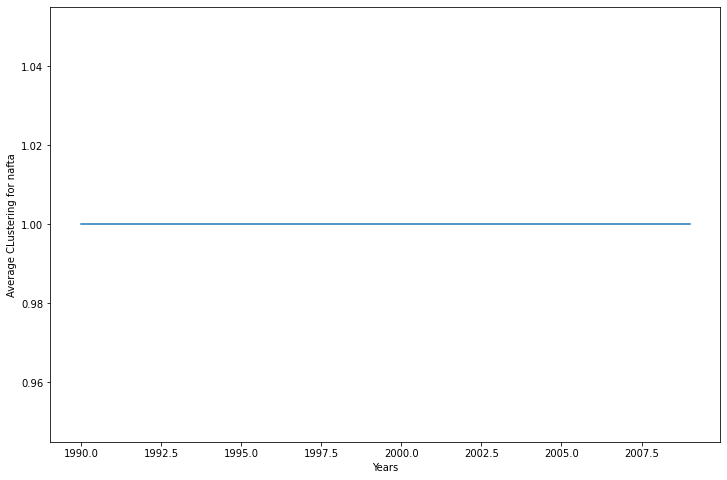

In [0]:

plt.plot(list_of_years,avg_clustering_coefficient)
plt.xlabel('Years')
plt.ylabel('Average CLustering for nafta')
plt.show()


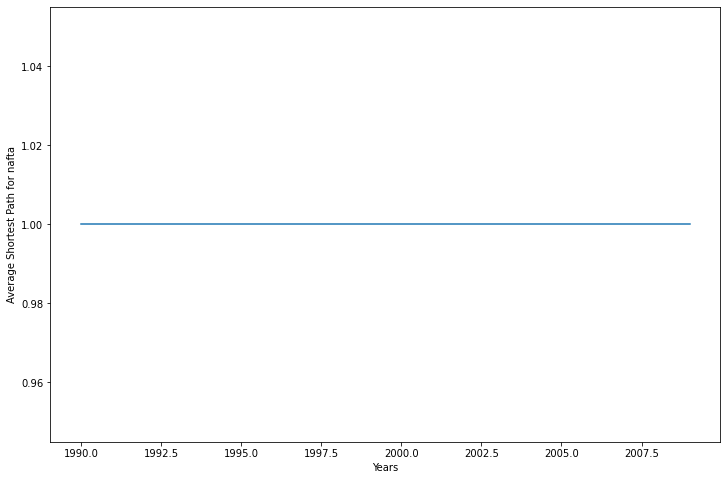

In [0]:
plt.plot( list_of_years,avg_shortest_path)
plt.xlabel('Years')
plt.ylabel('Average Shortest Path for nafta')
plt.show()


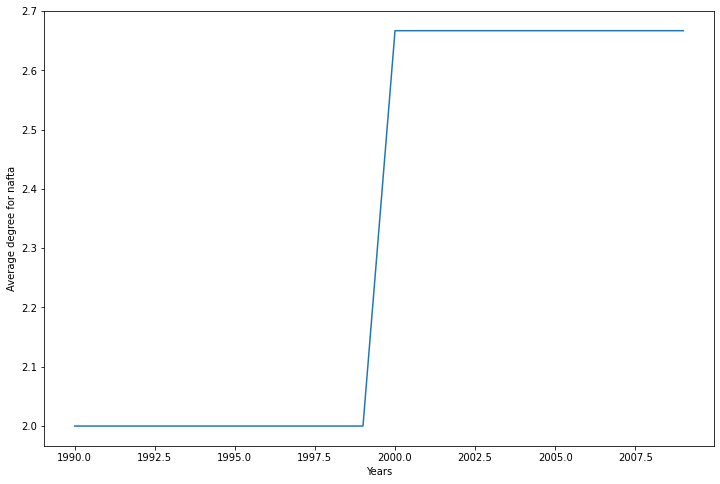

In [0]:

plt.plot( list_of_years,avg_degree)
plt.xlabel('Years')
plt.ylabel('Average degree for nafta')
plt.show()

In [0]:
#for i in range(0,20):
 # Lovian_Community_Detection(Nafta_subgraph[i])
#Number of communities have risen from a consistent 1 throughout 1990-2000 to now 5
#modularity fluctuation indicate lower economic partnership over the years 1990-2010

In [0]:
#EUROPEAN UNION
#ESTABLISHED 1993
#CONCLUSION-> No point in analysing this since European union itself is one node in the dataset and the we have different data for 
#its members as well . Hence many metrics like degree ,betweenness, community are zero

In [0]:

European_union_list = ['Austria', 'Bulgaria', 'Cyprus', 'Denmark', 
                       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
                        'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Spain','Sweden','United Kingdom']

In [0]:
European_union_list[1]

'Bulgaria'

In [0]:
degree_deviation_european_union = []
degree_european_union_yearwise = []
for j in range(0,20):
  degree_deviation_european_union = []
  for i in range(len(European_union_list)):
    print(graph_list[j].degree[European_union_list[i]],"  ",European_union_list[i]," ", list_of_years[j])
    degree_deviation_european_union.append(graph_list[j].degree[European_union_list[i]])
  degree_european_union_yearwise.append(degree_deviation_european_union)
#degree_deviation_European_union

177    Austria   1990
86    Bulgaria   1990
134    Cyprus   1990
173    Denmark   1990
156    Finland   1990
182    France   1990
187    Germany   1990
156    Greece   1990
94    Hungary   1990
157    Ireland   1990
182    Italy   1990
118    Malta   1990
181    Netherlands   1990
106    Poland   1990
168    Portugal   1990
114    Romania   1990
184    Spain   1990
171    Sweden   1990
189    United Kingdom   1990
172    Austria   1991
89    Bulgaria   1991
127    Cyprus   1991
164    Denmark   1991
147    Finland   1991
184    France   1991
185    Germany   1991
154    Greece   1991
147    Hungary   1991
162    Ireland   1991
184    Italy   1991
121    Malta   1991
180    Netherlands   1991
136    Poland   1991
167    Portugal   1991
123    Romania   1991
179    Spain   1991
172    Sweden   1991
187    United Kingdom   1991
191    Austria   1992
155    Bulgaria   1992
137    Cyprus   1992
183    Denmark   1992
162    Finland   1992
199    France   1992
205    Germany   1992
169    Gre

In [0]:
#List of degree of ASEAN countries from 1990-2010 
print('Countries in Nafta',European_union_list)
print('List of year analyzed',list_of_years)
print('Degree distribution across years for each country',degree_european_union_yearwise)

Countries in Nafta ['Austria', 'Bulgaria', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden', 'United Kingdom']
List of year analyzed [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
Degree distribution across years for each country [[177, 86, 134, 173, 156, 182, 187, 156, 94, 157, 182, 118, 181, 106, 168, 114, 184, 171, 189], [172, 89, 127, 164, 147, 184, 185, 154, 147, 162, 184, 121, 180, 136, 167, 123, 179, 172, 187], [191, 155, 137, 183, 162, 199, 205, 169, 156, 171, 205, 125, 193, 167, 177, 141, 199, 190, 191], [193, 98, 150, 177, 176, 201, 210, 175, 176, 180, 204, 135, 196, 174, 188, 153, 194, 192, 204], [199, 104, 156, 179, 169, 202, 207, 176, 179, 190, 204, 139, 199, 161, 184, 157, 197, 191, 203], [198, 116, 158, 184, 186, 204, 212, 178, 177, 194, 190, 131, 201, 167, 186, 161, 202, 189, 207

In [0]:
European_union_subgraph= []
for i in range(0,20):
  European_union_subgraph.append('European_union_'+str(1990+i))
European_union_subgraph


['European_union_1990',
 'European_union_1991',
 'European_union_1992',
 'European_union_1993',
 'European_union_1994',
 'European_union_1995',
 'European_union_1996',
 'European_union_1997',
 'European_union_1998',
 'European_union_1999',
 'European_union_2000',
 'European_union_2001',
 'European_union_2002',
 'European_union_2003',
 'European_union_2004',
 'European_union_2005',
 'European_union_2006',
 'European_union_2007',
 'European_union_2008',
 'European_union_2009']

In [0]:
for i in range(0,20):
  European_union_subgraph[i] = graph_list[i].subgraph(European_union_list)

In [0]:
for i in range(0,20):
  print(1990+i )
  print(sorted(nx.degree_centrality(European_union_subgraph[i]).items(),key = lambda x:x[1],reverse = True))



1990
[('Greece', 1.0), ('Poland', 1.0), ('Germany', 1.0), ('Malta', 1.0), ('Netherlands', 1.0), ('United Kingdom', 1.0), ('France', 1.0), ('Austria', 1.0), ('Spain', 1.0), ('Denmark', 1.0), ('Romania', 1.0), ('Italy', 1.0), ('Sweden', 1.0), ('Ireland', 1.0), ('Finland', 1.0), ('Portugal', 1.0), ('Cyprus', 1.0), ('Bulgaria', 0.9444444444444444), ('Hungary', 0.9444444444444444)]
1991
[('Greece', 1.0), ('Poland', 1.0), ('Germany', 1.0), ('Bulgaria', 1.0), ('Malta', 1.0), ('Netherlands', 1.0), ('United Kingdom', 1.0), ('France', 1.0), ('Austria', 1.0), ('Spain', 1.0), ('Denmark', 1.0), ('Romania', 1.0), ('Italy', 1.0), ('Sweden', 1.0), ('Ireland', 1.0), ('Finland', 1.0), ('Portugal', 1.0), ('Hungary', 1.0), ('Cyprus', 1.0)]
1992
[('Greece', 1.0), ('Poland', 1.0), ('Germany', 1.0), ('Bulgaria', 1.0), ('Malta', 1.0), ('Netherlands', 1.0), ('United Kingdom', 1.0), ('France', 1.0), ('Austria', 1.0), ('Spain', 1.0), ('Denmark', 1.0), ('Romania', 1.0), ('Italy', 1.0), ('Sweden', 1.0), ('Ireland'

In [0]:
European_union_betweenness = []

for i in range(0,20):
  case_list = {}
  print(1990+i)
  print(sorted(nx.betweenness_centrality(European_union_subgraph[i]).items(),key = lambda x:x[1],reverse = True))
  #print(nx.betweenness_centrality(Mercusor_subgraph[i]))
  European_union_betweenness.append(nx.betweenness_centrality(European_union_subgraph[i]))
  




1990
[('Greece', 0.00038446751249519417), ('Poland', 0.00038446751249519417), ('Germany', 0.00038446751249519417), ('Malta', 0.00038446751249519417), ('Netherlands', 0.00038446751249519417), ('United Kingdom', 0.00038446751249519417), ('France', 0.00038446751249519417), ('Austria', 0.00038446751249519417), ('Spain', 0.00038446751249519417), ('Denmark', 0.00038446751249519417), ('Romania', 0.00038446751249519417), ('Italy', 0.00038446751249519417), ('Sweden', 0.00038446751249519417), ('Ireland', 0.00038446751249519417), ('Finland', 0.00038446751249519417), ('Portugal', 0.00038446751249519417), ('Cyprus', 0.00038446751249519417), ('Bulgaria', 0.0), ('Hungary', 0.0)]
1991
[('Greece', 0.0), ('Poland', 0.0), ('Germany', 0.0), ('Bulgaria', 0.0), ('Malta', 0.0), ('Netherlands', 0.0), ('United Kingdom', 0.0), ('France', 0.0), ('Austria', 0.0), ('Spain', 0.0), ('Denmark', 0.0), ('Romania', 0.0), ('Italy', 0.0), ('Sweden', 0.0), ('Ireland', 0.0), ('Finland', 0.0), ('Portugal', 0.0), ('Hungary', 

In [0]:
European_union_betweenness

[{'Austria': 0.00038446751249519417,
  'Bulgaria': 0.0,
  'Cyprus': 0.00038446751249519417,
  'Denmark': 0.00038446751249519417,
  'Finland': 0.00038446751249519417,
  'France': 0.00038446751249519417,
  'Germany': 0.00038446751249519417,
  'Greece': 0.00038446751249519417,
  'Hungary': 0.0,
  'Ireland': 0.00038446751249519417,
  'Italy': 0.00038446751249519417,
  'Malta': 0.00038446751249519417,
  'Netherlands': 0.00038446751249519417,
  'Poland': 0.00038446751249519417,
  'Portugal': 0.00038446751249519417,
  'Romania': 0.00038446751249519417,
  'Spain': 0.00038446751249519417,
  'Sweden': 0.00038446751249519417,
  'United Kingdom': 0.00038446751249519417},
 {'Austria': 0.0,
  'Bulgaria': 0.0,
  'Cyprus': 0.0,
  'Denmark': 0.0,
  'Finland': 0.0,
  'France': 0.0,
  'Germany': 0.0,
  'Greece': 0.0,
  'Hungary': 0.0,
  'Ireland': 0.0,
  'Italy': 0.0,
  'Malta': 0.0,
  'Netherlands': 0.0,
  'Poland': 0.0,
  'Portugal': 0.0,
  'Romania': 0.0,
  'Spain': 0.0,
  'Sweden': 0.0,
  'United Kin

Completed Louvain algorithm .. . . 
                                                                                                                                                                                                     Members
Community_Num                                                                                                                                                                                               
0              Greece | Poland | Germany | Bulgaria | Malta | Netherlands | United Kingdom | France | Austria | Spain | Denmark | Romania | Italy | Sweden | Ireland | Finland | Portugal | Hungary | Cyprus
Modularity:  0.0
Total number of Communities= 1
Community_Num                                                                                                                                                                                              0
Members        Greece | Poland | Germany | Bulgaria | Malta | Netherlands | United Kingdom | Fra

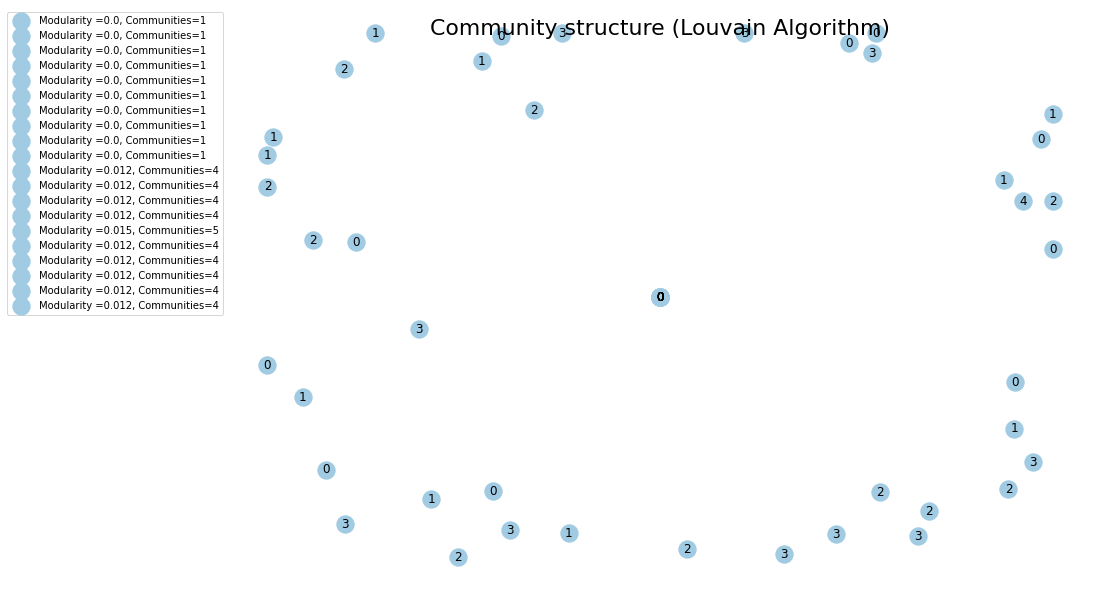

In [0]:
for i in range(0,20):
  Lovian_Community_Detection(European_union_subgraph[i])
#Number of communities have risen from a consistent 1 throughout 1990-2000 to now 5
#modularity fluctuation indicate lower economic partnership over the years 1990-2010